In [1]:
#imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder ,  StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import (
    mutual_info_regression,  # Information Gain
    chi2,                    # Chi-square Test
    f_classif,               # ANOVA (F-test)
    SelectKBest,             # Select top k features
    VarianceThreshold        # Variance Threshold
)

# Preprocessing

In [2]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')


In [3]:
train = train_transaction.merge(train_identity, on='TransactionID', how='left')
test = test_transaction.merge(test_identity, on='TransactionID', how='left')

In [4]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Rows, Cols = train.shape
print("Number of Row in Data = ", Rows)
print("Number of Columns in Data = ", Cols)

Number of Row in Data =  9875
Number of Columns in Data =  434


In [7]:
Rows, Cols = test.shape
print("Number of Row in Data = ", Rows)
print("Number of Columns in Data = ", Cols)

Number of Row in Data =  9221
Number of Columns in Data =  433


In [8]:
train.isnull().sum()

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,7794
id_37,7794
id_38,7794
DeviceType,7794


In [9]:
test.isnull().sum()

,0
TransactionID,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
card1,0
...,...
id-36,8167
id-37,8167
id-38,8167
DeviceType,8169


In [10]:
import pandas as pd
import numpy as np

categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

drop_cols = [col for col in train.columns if train[col].isnull().mean() > 0.90]
print("Dropping these columns due to too many missing values:", drop_cols)
train.drop(columns=drop_cols, inplace=True)

#Fill missing values in categorical columns with mode
for col in categorical_cols:
    if col in train.columns and train[col].isnull().sum() > 0:
        mode_val = train[col].mode()[0]
        train[col] = train[col].fillna(mode_val)

#Fill missing values in numerical columns with mean
for col in numerical_cols:
    if col in train.columns and train[col].isnull().sum() > 0:
        mean_val = train[col].mean()
        train[col] = train[col].fillna(mean_val)

#In case any values remain
train = train.fillna("unknown")

# Final check
print("Missing values after processing:")
print(train.isnull().sum().sum(), "missing values remaining.")


Dropping these columns due to too many missing values: ['dist2', 'D6', 'D7', 'D12', 'D13', 'D14', 'id_03', 'id_04', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']
Missing values after processing:
0 missing values remaining.


In [11]:
categorical_cols = test.select_dtypes(include=['object']).columns.tolist()
numerical_cols = test.select_dtypes(include=[np.number]).columns.tolist()

drop_cols = [col for col in test.columns if test[col].isnull().mean() > 0.90]
print("Dropping these columns due to too many missing values:", drop_cols)
test.drop(columns=drop_cols, inplace=True)

for col in categorical_cols:
    if col in test.columns and test[col].isnull().sum() > 0:
        mode_val = test[col].mode()[0]
        test[col] = test[col].fillna(mode_val)


for col in numerical_cols:
    if col in test.columns and test[col].isnull().sum() > 0:
        mean_val = test[col].mean()
        test[col] = test[col].fillna(mean_val)


test = test.fillna("unknown")


print("Missing values after processing:")
print(test.isnull().sum().sum(), "missing values remaining.")


Dropping these columns due to too many missing values: ['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id-03', 'id-04', 'id-07', 'id-08', 'id-09', 'id-10', 'id-14', 'id-18', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-30', 'id-32', 'id-33', 'id-34', 'DeviceInfo']
Missing values after processing:
0 missing values remaining.


Finally no NaNs

In [12]:
train.isnull().sum()

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,0
id_37,0
id_38,0
DeviceType,0


In [13]:
test.isnull().sum()

,0
TransactionID,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
card1,0
...,...
id-35,0
id-36,0
id-37,0
id-38,0


In [14]:
train.dtypes

,0
TransactionID,int64
isFraud,int64
TransactionDT,int64
TransactionAmt,float64
ProductCD,object
...,...
id_36,object
id_37,object
id_38,object
DeviceType,object


In [15]:
test.dtypes

,0
TransactionID,int64
TransactionDT,int64
TransactionAmt,float64
ProductCD,object
card1,int64
...,...
id-35,object
id-36,object
id-37,object
id-38,object


In [16]:
categorical_columns1 = train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns1)

Categorical Columns: Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')


In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns1:
    train[col] = label_encoder.fit_transform(train[col])

target_column = 'isFraud'

numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop(target_column)

scaler = StandardScaler()
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])




In [18]:
categorical_columns2 = test.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns2)

Categorical Columns: Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id-12', 'id-15',
       'id-16', 'id-28', 'id-29', 'id-31', 'id-35', 'id-36', 'id-37', 'id-38',
       'DeviceType'],
      dtype='object')


In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


label_encoder = LabelEncoder()
for col in categorical_columns2:
    test[col] = label_encoder.fit_transform(test[col])


numerical_columns = test.select_dtypes(include=['int64', 'float64']).columns


scaler = StandardScaler()
test[numerical_columns] = scaler.fit_transform(test[numerical_columns])




In [20]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,-1.731875,0,-1.793679,-0.293366,0.513089,0.858810,-3.626993e-16,-0.268474,-2.784046,-1.495221,...,-0.297403,0.000000,0.020884,0.186092,0.289987,-0.133141,0.220787,0.16798,-0.291626,0.173696
1,-1.731525,0,-1.793661,-0.476045,0.513089,-1.479324,3.491094e-01,-0.268474,-1.033046,-2.520465,...,-0.297403,0.000000,0.020884,0.186092,0.289987,-0.133141,0.220787,0.16798,-0.291626,0.173696
2,-1.731174,0,-1.792428,-0.337301,0.513089,-1.079972,8.978473e-01,-0.268474,0.717954,-0.880075,...,-0.297403,0.000000,0.020884,0.186092,0.289987,-0.133141,0.220787,0.16798,-0.291626,0.173696
3,-1.730823,0,-1.791884,-0.378924,0.513089,1.739142,1.389159e+00,-0.268474,-1.033046,-2.135999,...,-0.297403,0.000000,0.020884,0.186092,0.289987,-0.133141,0.220787,0.16798,-0.291626,0.173696
4,-1.730472,0,-1.791757,-0.378924,-1.679679,-1.114716,1.050983e+00,-0.268474,-1.033046,-2.520465,...,4.554900,3.614334,2.649851,0.186092,0.289987,-0.133141,0.220787,0.16798,3.429052,-3.395745


In [21]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-19,id-20,id-28,id-29,id-31,id-35,id-36,id-37,id-38,DeviceType
0,-1.731863,-2.096729,-0.473357,0.342572,0.106863,-1.520116,-0.130888,0.709049,0.631248,0.469247,...,0.0,1.021413e-15,-0.227563,-0.22809,-0.189588,0.235621,-0.072338,0.163472,-0.201854,-0.235108
1,-1.731487,-2.096209,-0.399471,0.342572,-1.190250,-1.520116,-0.130888,0.709049,0.631248,0.469247,...,0.0,1.021413e-15,-0.227563,-0.22809,-0.189588,0.235621,-0.072338,0.163472,-0.201854,-0.235108
2,-1.731112,-2.095581,0.129219,0.342572,-1.147133,1.441072,-0.130888,0.709049,0.631248,0.469247,...,0.0,1.021413e-15,-0.227563,-0.22809,-0.189588,0.235621,-0.072338,0.163472,-0.201854,-0.235108
3,-1.730736,-2.095581,0.623024,0.342572,0.229452,0.072402,-0.130888,0.709049,-0.875246,0.469247,...,0.0,1.021413e-15,-0.227563,-0.22809,-0.189588,0.235621,-0.072338,0.163472,-0.201854,-0.235108
4,-1.730360,-2.095488,-0.317350,0.342572,1.715098,0.660802,-0.130888,-1.184418,-2.105550,0.469247,...,0.0,1.021413e-15,-0.227563,-0.22809,-0.189588,0.235621,-0.072338,0.163472,-0.201854,-0.235108


In [22]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,9875.000000,9875.000000,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,...,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03,9.875000e+03
mean,0.000000,0.026835,4.605036e-17,1.295167e-16,-4.029407e-17,1.582981e-16,-3.158767e-16,5.184264e-16,3.698420e-16,-5.036759e-17,...,-2.288127e-16,1.151259e-17,4.865869e-16,-2.302518e-16,2.460816e-16,-1.169248e-17,-2.432035e-16,-2.822384e-16,4.605036e-17,-6.475833e-16
std,1.000051,0.161610,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-1.731875,0.000000,-1.793679e+00,-6.013951e-01,-2.410602e+00,-1.844350e+00,-1.590615e+00,-5.178115e+00,-4.535046e+00,-2.571727e+00,...,-4.109927e+00,-2.077701e+00,-5.529159e+00,-1.022558e+01,-3.448426e+00,-1.331408e-01,-4.529256e+00,-5.953076e+00,-2.916258e-01,-7.585958e+00
25%,-0.865938,0.000000,-7.068131e-01,-4.066729e-01,5.130894e-01,-7.228995e-01,-9.908320e-01,-2.684739e-01,-1.033046e+00,-8.800752e-01,...,-2.974032e-01,0.000000e+00,2.088384e-02,1.860922e-01,2.899873e-01,-1.331408e-01,2.207868e-01,1.679804e-01,-2.916258e-01,1.736958e-01
50%,0.000000,0.000000,-2.576280e-01,-2.633044e-01,5.130894e-01,-6.756896e-02,-4.011167e-02,-2.684739e-01,7.179544e-01,6.065278e-01,...,-2.974032e-01,0.000000e+00,2.088384e-02,1.860922e-01,2.899873e-01,-1.331408e-01,2.207868e-01,1.679804e-01,-2.916258e-01,1.736958e-01
75%,0.865938,0.000000,9.685931e-01,1.175499e-02,5.130894e-01,8.282517e-01,9.233700e-01,-2.684739e-01,7.179544e-01,6.577900e-01,...,-2.974032e-01,0.000000e+00,2.088384e-02,1.860922e-01,2.899873e-01,-1.331408e-01,2.207868e-01,1.679804e-01,-2.916258e-01,1.736958e-01
max,1.731875,1.000000,2.245632e+00,1.441074e+01,5.130894e-01,1.793143e+00,1.599721e+00,7.095988e+00,7.179544e-01,9.397320e-01,...,4.554900e+00,3.614334e+00,9.368324e+00,1.860922e-01,2.899873e-01,7.510845e+00,2.207868e-01,1.679804e-01,3.429052e+00,1.208316e+00


In [23]:
test.describe()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-19,id-20,id-28,id-29,id-31,id-35,id-36,id-37,id-38,DeviceType
count,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,...,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03,9.221000e+03
mean,-4.931649e-17,1.898685e-14,1.032564e-16,-1.918720e-16,1.649020e-16,-5.182084e-17,1.266817e-15,1.132738e-16,2.696996e-17,-2.735524e-17,...,-6.472789e-17,9.701478e-16,4.931649e-17,1.541140e-17,-3.059163e-16,-1.063387e-16,2.003482e-17,-2.065128e-16,4.661949e-17,-3.544623e-17
std,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,...,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00
min,-1.731863e+00,-2.096729e+00,-6.107470e-01,-3.544053e+00,-1.875478e+00,-1.590468e+00,-6.244942e+00,-4.971352e+00,-2.532390e+00,-2.131072e+00,...,-5.431005e+00,-5.338792e+00,-2.275634e-01,-2.280901e-01,-5.211257e+00,-4.244098e+00,-7.233774e-02,-6.117257e+00,-2.018537e-01,-2.351081e-01
25%,-8.659315e-01,-9.246980e-01,-3.994705e-01,3.425718e-01,-7.130002e-01,-9.892766e-01,-1.308876e-01,-1.184418e+00,-8.752462e-01,4.692475e-01,...,0.000000e+00,1.021413e-15,-2.275634e-01,-2.280901e-01,-1.895885e-01,2.356213e-01,-7.233774e-02,1.634720e-01,-2.018537e-01,-2.351081e-01
50%,0.000000e+00,5.575450e-02,-2.781319e-01,3.425718e-01,-8.526247e-02,-1.386546e-01,-1.308876e-01,7.090490e-01,6.312479e-01,4.692475e-01,...,0.000000e+00,1.021413e-15,-2.275634e-01,-2.280901e-01,-1.895885e-01,2.356213e-01,-7.233774e-02,1.634720e-01,-2.018537e-01,-2.351081e-01
75%,8.659315e-01,9.578909e-01,2.088102e-02,3.425718e-01,8.149177e-01,9.038370e-01,-1.308876e-01,7.090490e-01,6.312479e-01,4.692475e-01,...,0.000000e+00,1.021413e-15,-2.275634e-01,-2.280901e-01,-1.895885e-01,2.356213e-01,-7.233774e-02,1.634720e-01,-2.018537e-01,-2.351081e-01
max,1.731863e+00,1.497480e+00,3.309210e+01,3.425718e-01,1.792667e+00,1.607359e+00,8.795632e+00,7.090490e-01,8.823303e-01,4.692475e-01,...,6.762123e+00,4.669881e+00,4.394380e+00,4.384232e+00,7.233747e+00,2.356213e-01,1.382404e+01,1.634720e-01,4.954083e+00,4.253363e+00


In [24]:
train.duplicated().sum()

np.int64(0)

In [25]:
test.duplicated().sum()

np.int64(0)

# EDA , Univariate Analysis

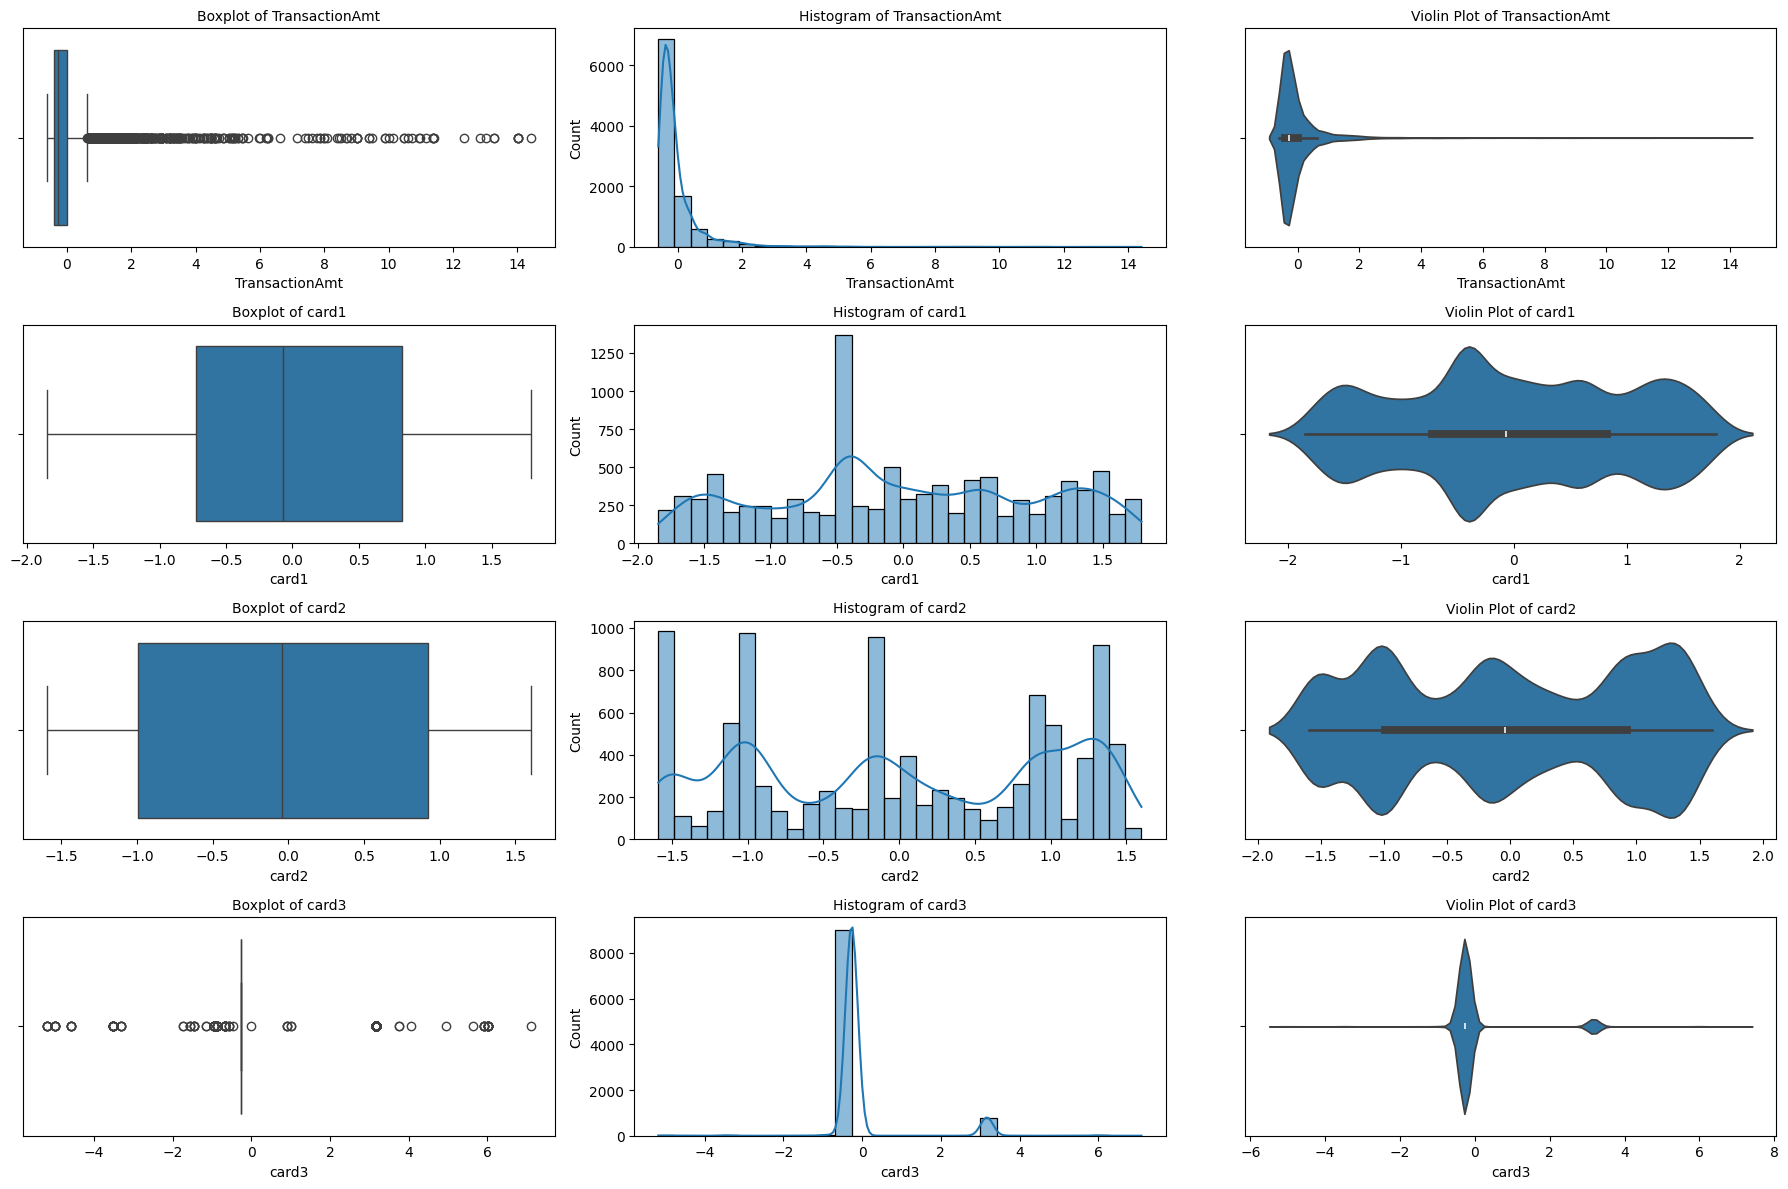

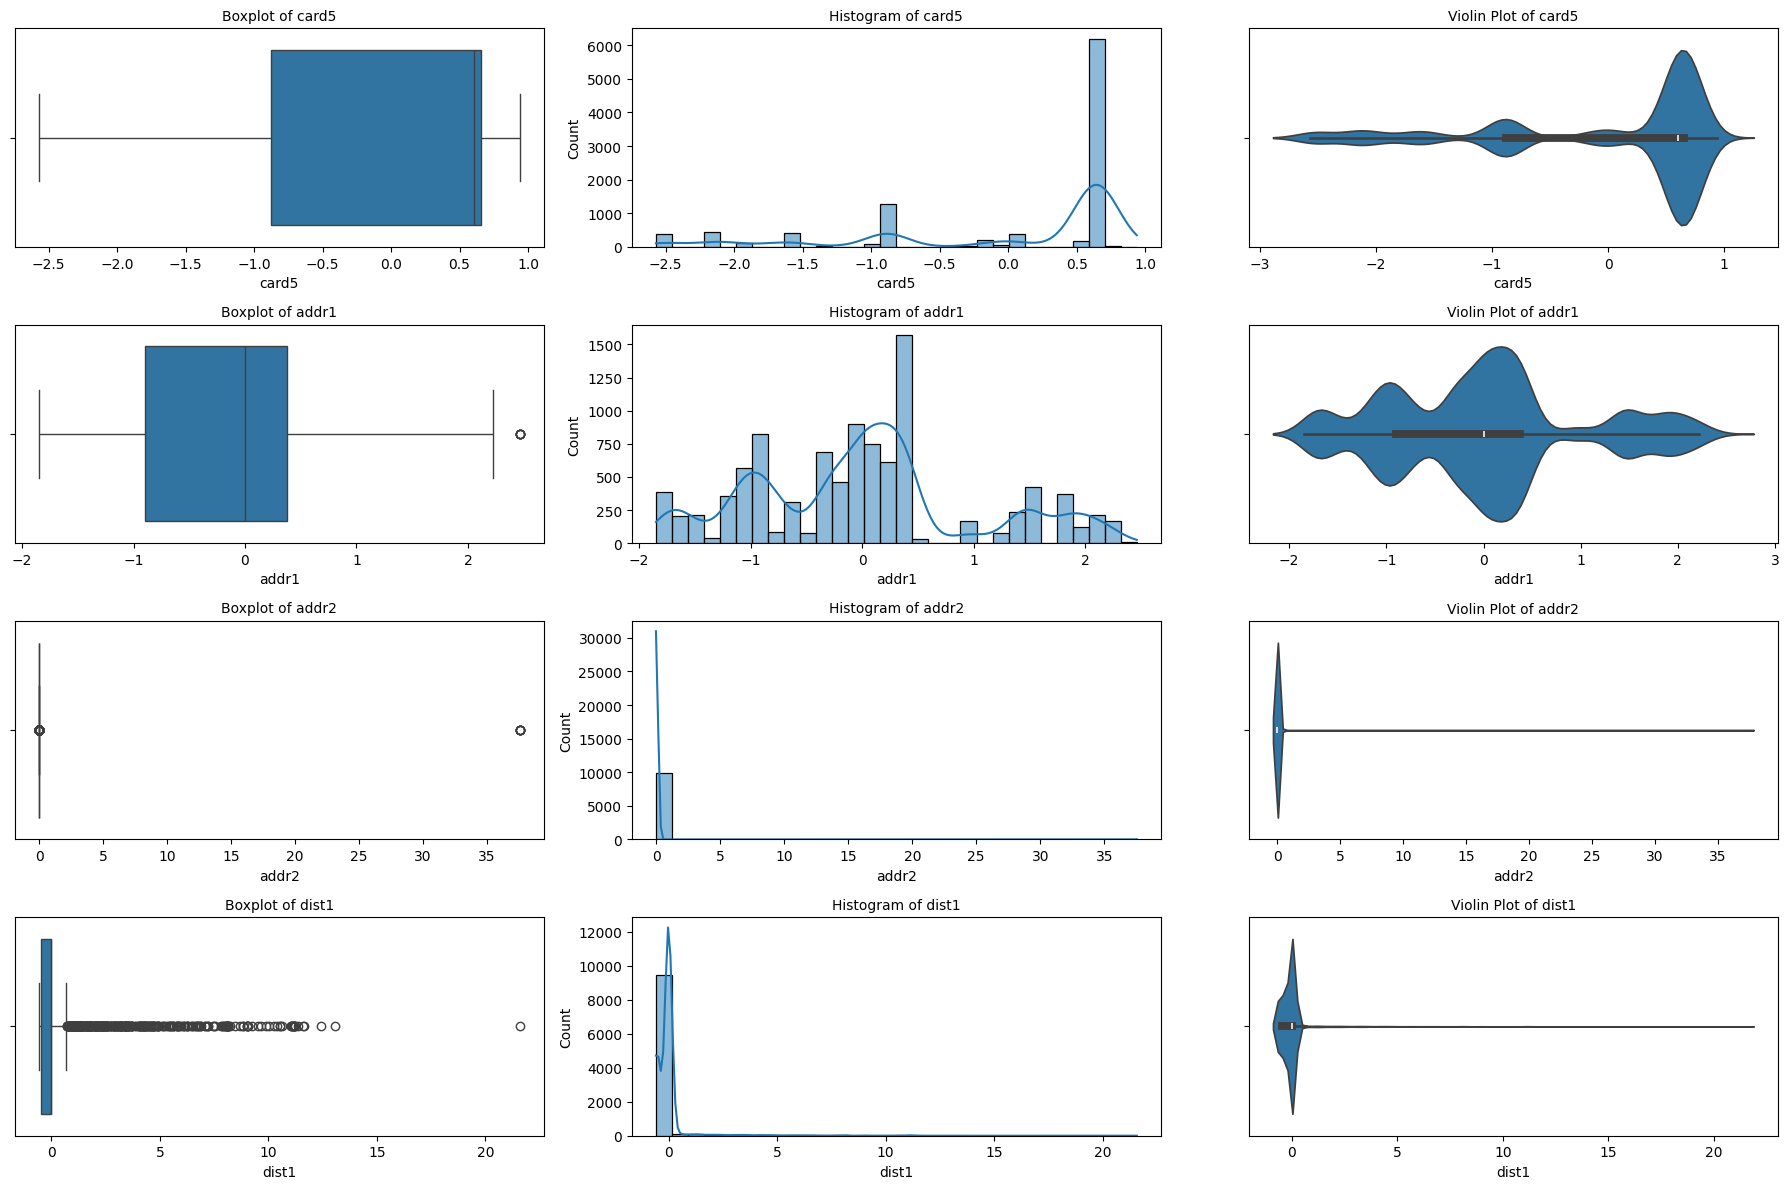

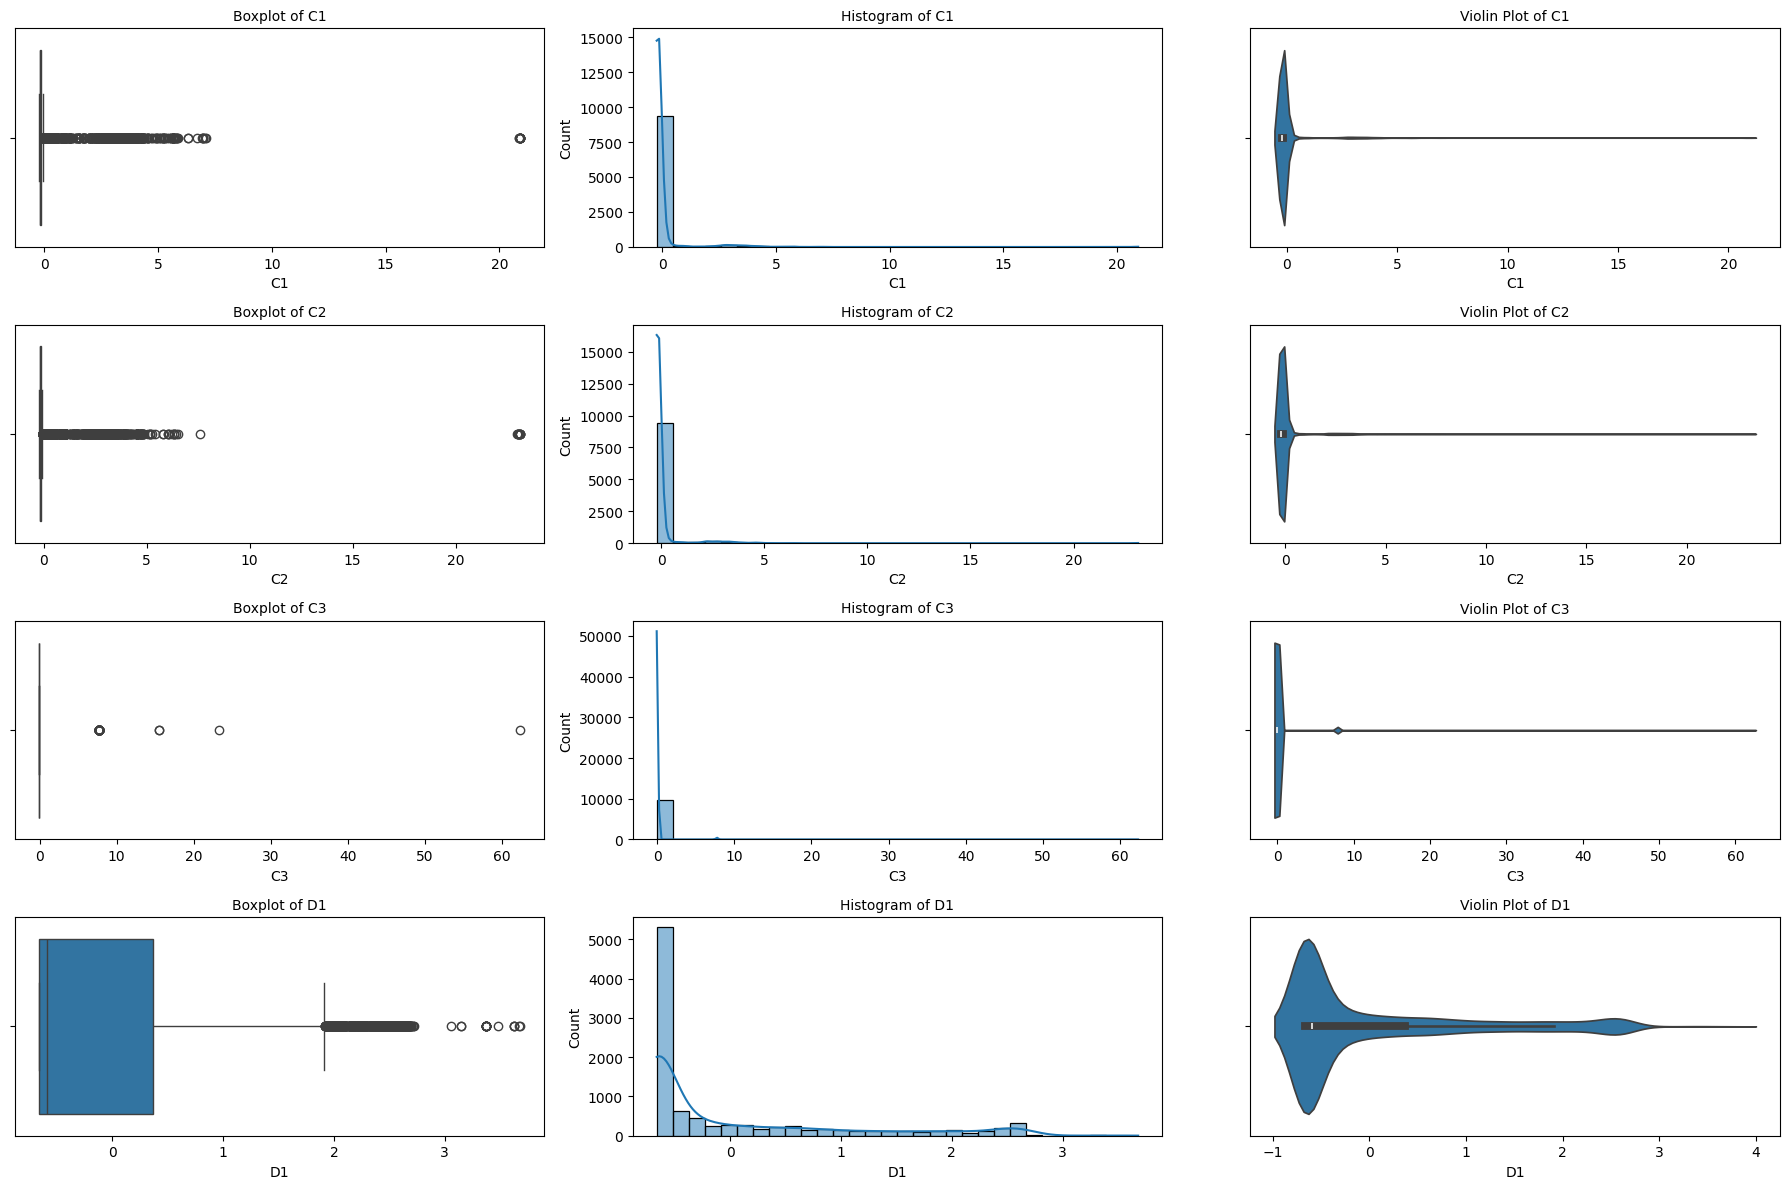

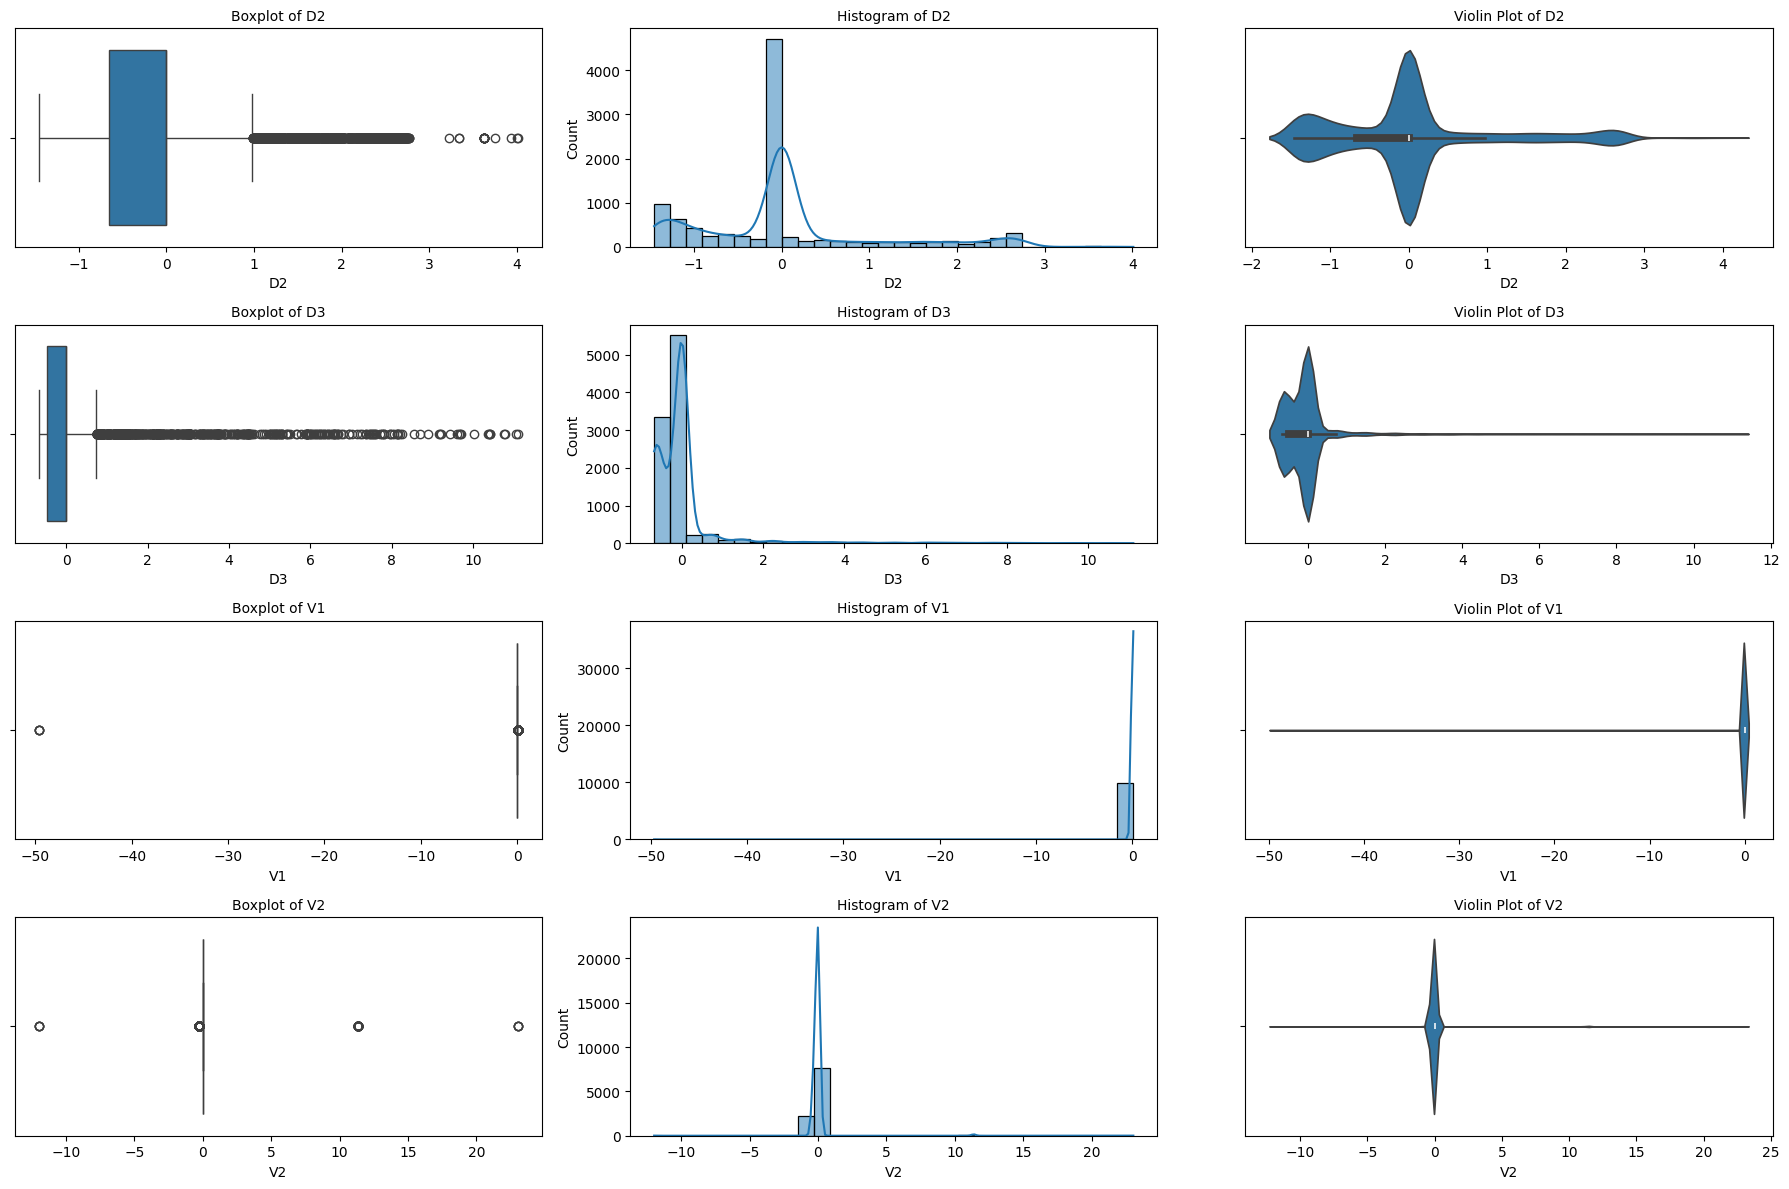

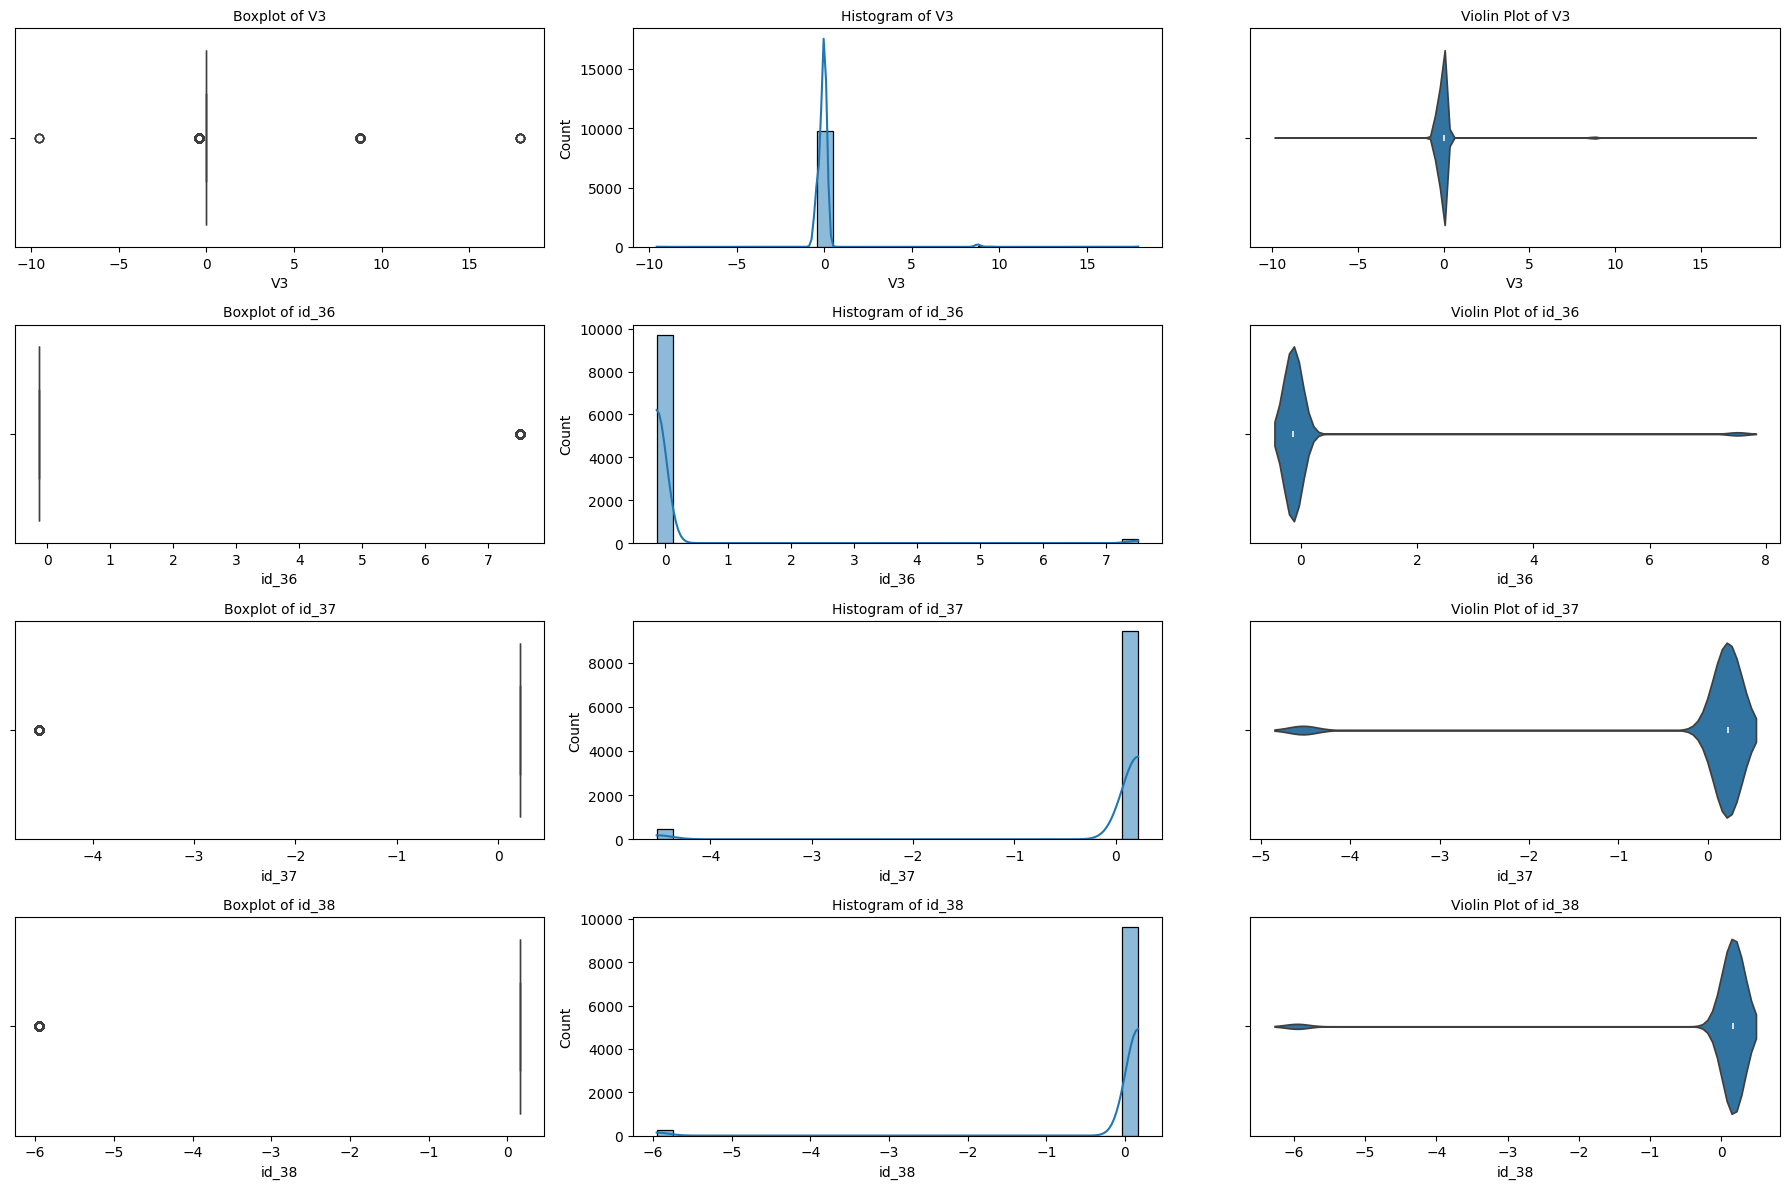

In [26]:
important_features = [
    'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
    'addr1', 'addr2', 'dist1', 'dist2',
    'C1', 'C2', 'C3', 'D1', 'D2', 'D3',
    'V1', 'V2', 'V3', 'id_36', 'id_37', 'id_38'
]


selected_features = [col for col in important_features if col in train.columns]

# Set batch size for readable plots
batch_size = 4

for i in range(0, len(selected_features), batch_size):
    batch = selected_features[i:i + batch_size]
    plt.figure(figsize=(18, 12))

    for j, col in enumerate(batch):
        # Boxplot
        plt.subplot(len(batch), 3, j * 3 + 1)
        sns.boxplot(x=train[col])
        plt.title(f'Boxplot of {col}', fontsize=10)

        # Histogram
        plt.subplot(len(batch), 3, j * 3 + 2)
        sns.histplot(train[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}', fontsize=10)

        # Violin plot
        plt.subplot(len(batch), 3, j * 3 + 3)
        sns.violinplot(x=train[col])
        plt.title(f'Violin Plot of {col}', fontsize=10)

    plt.tight_layout()
    plt.show()


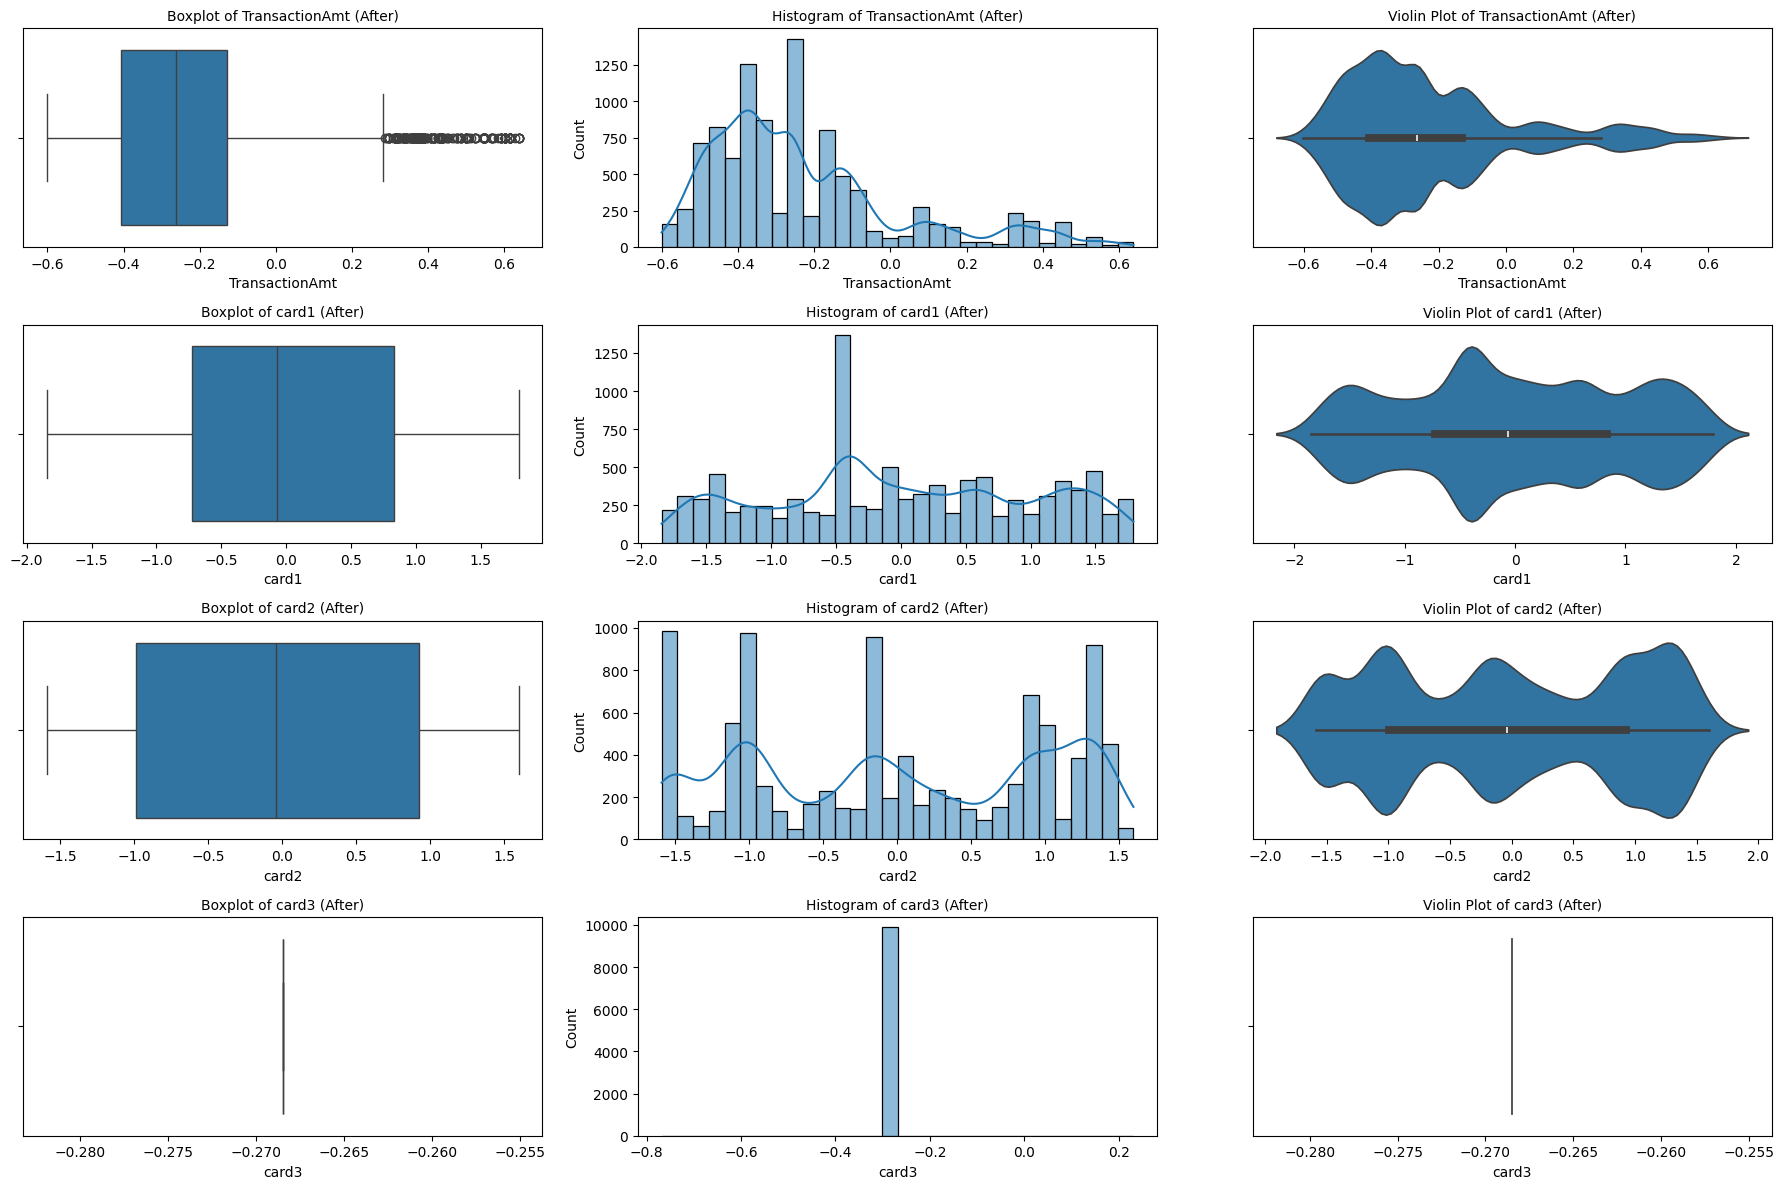

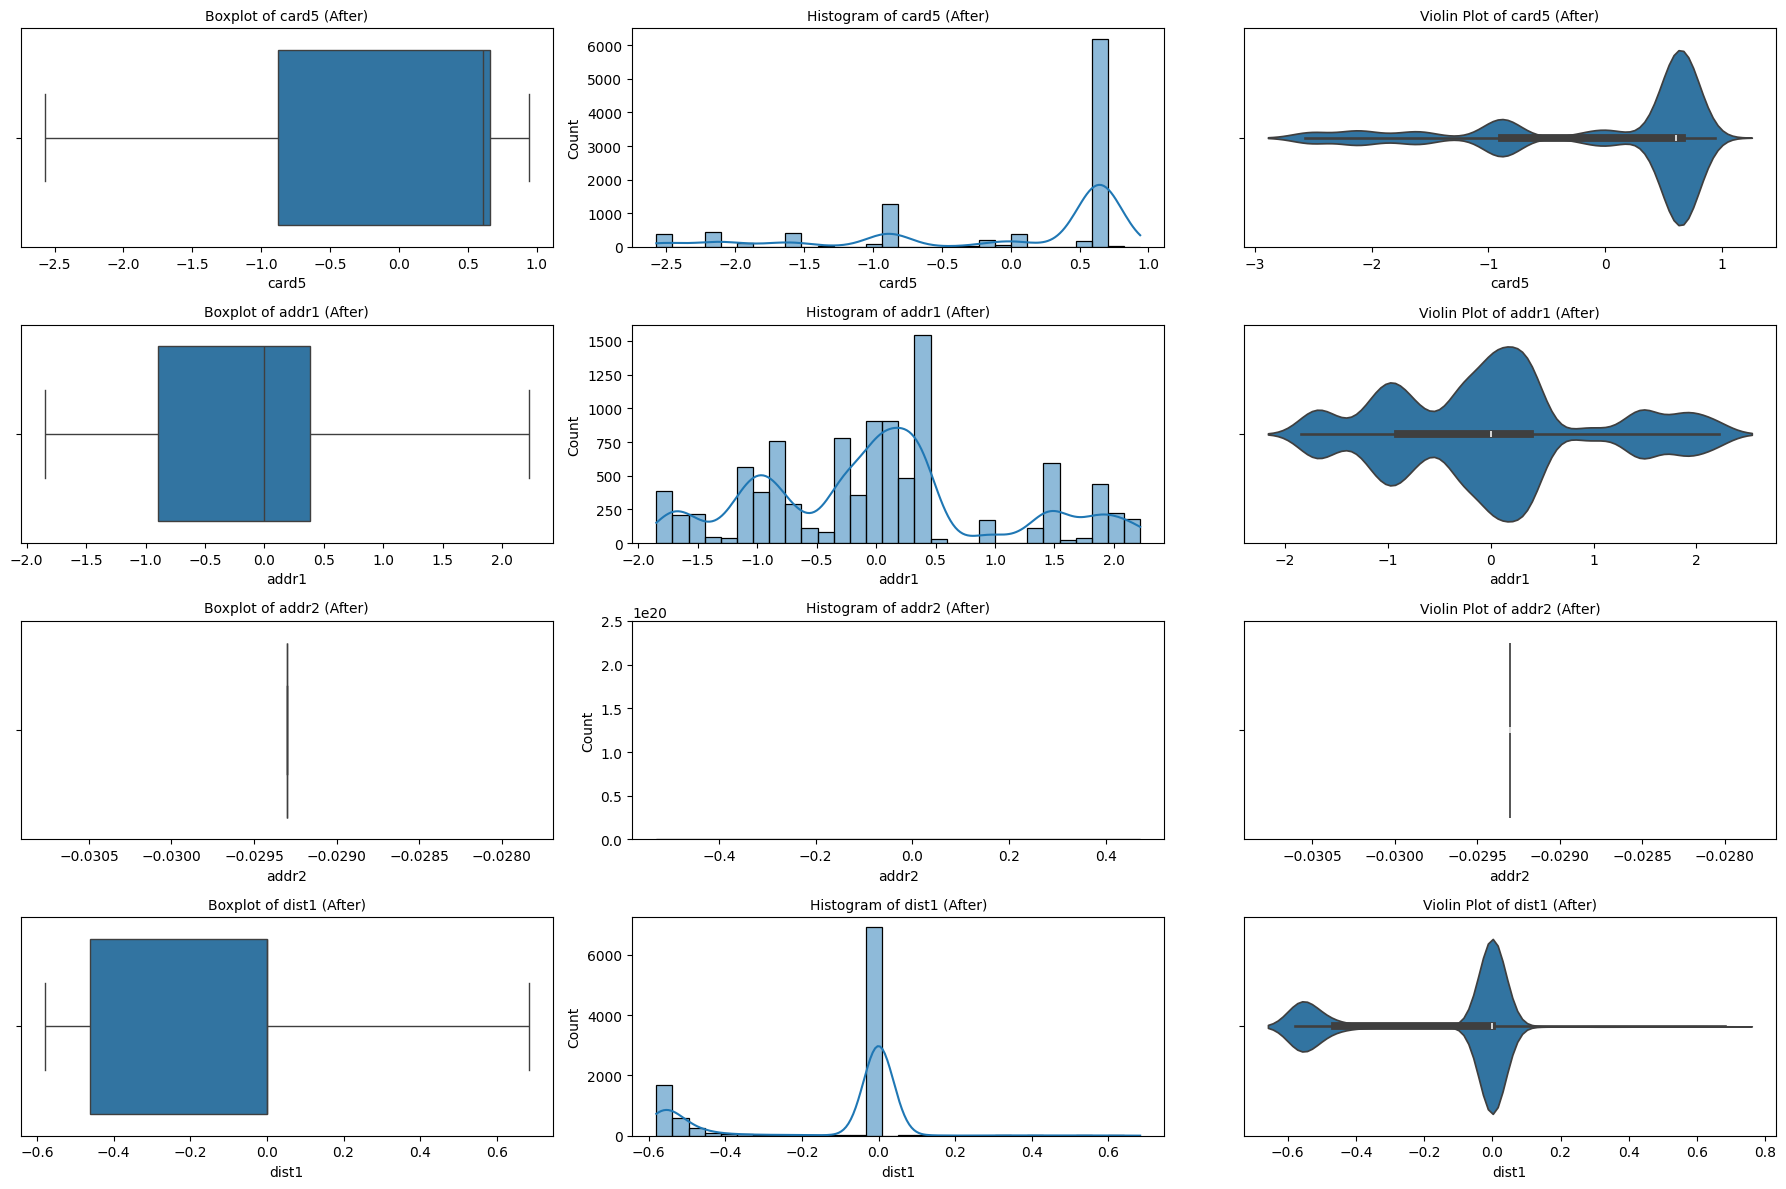

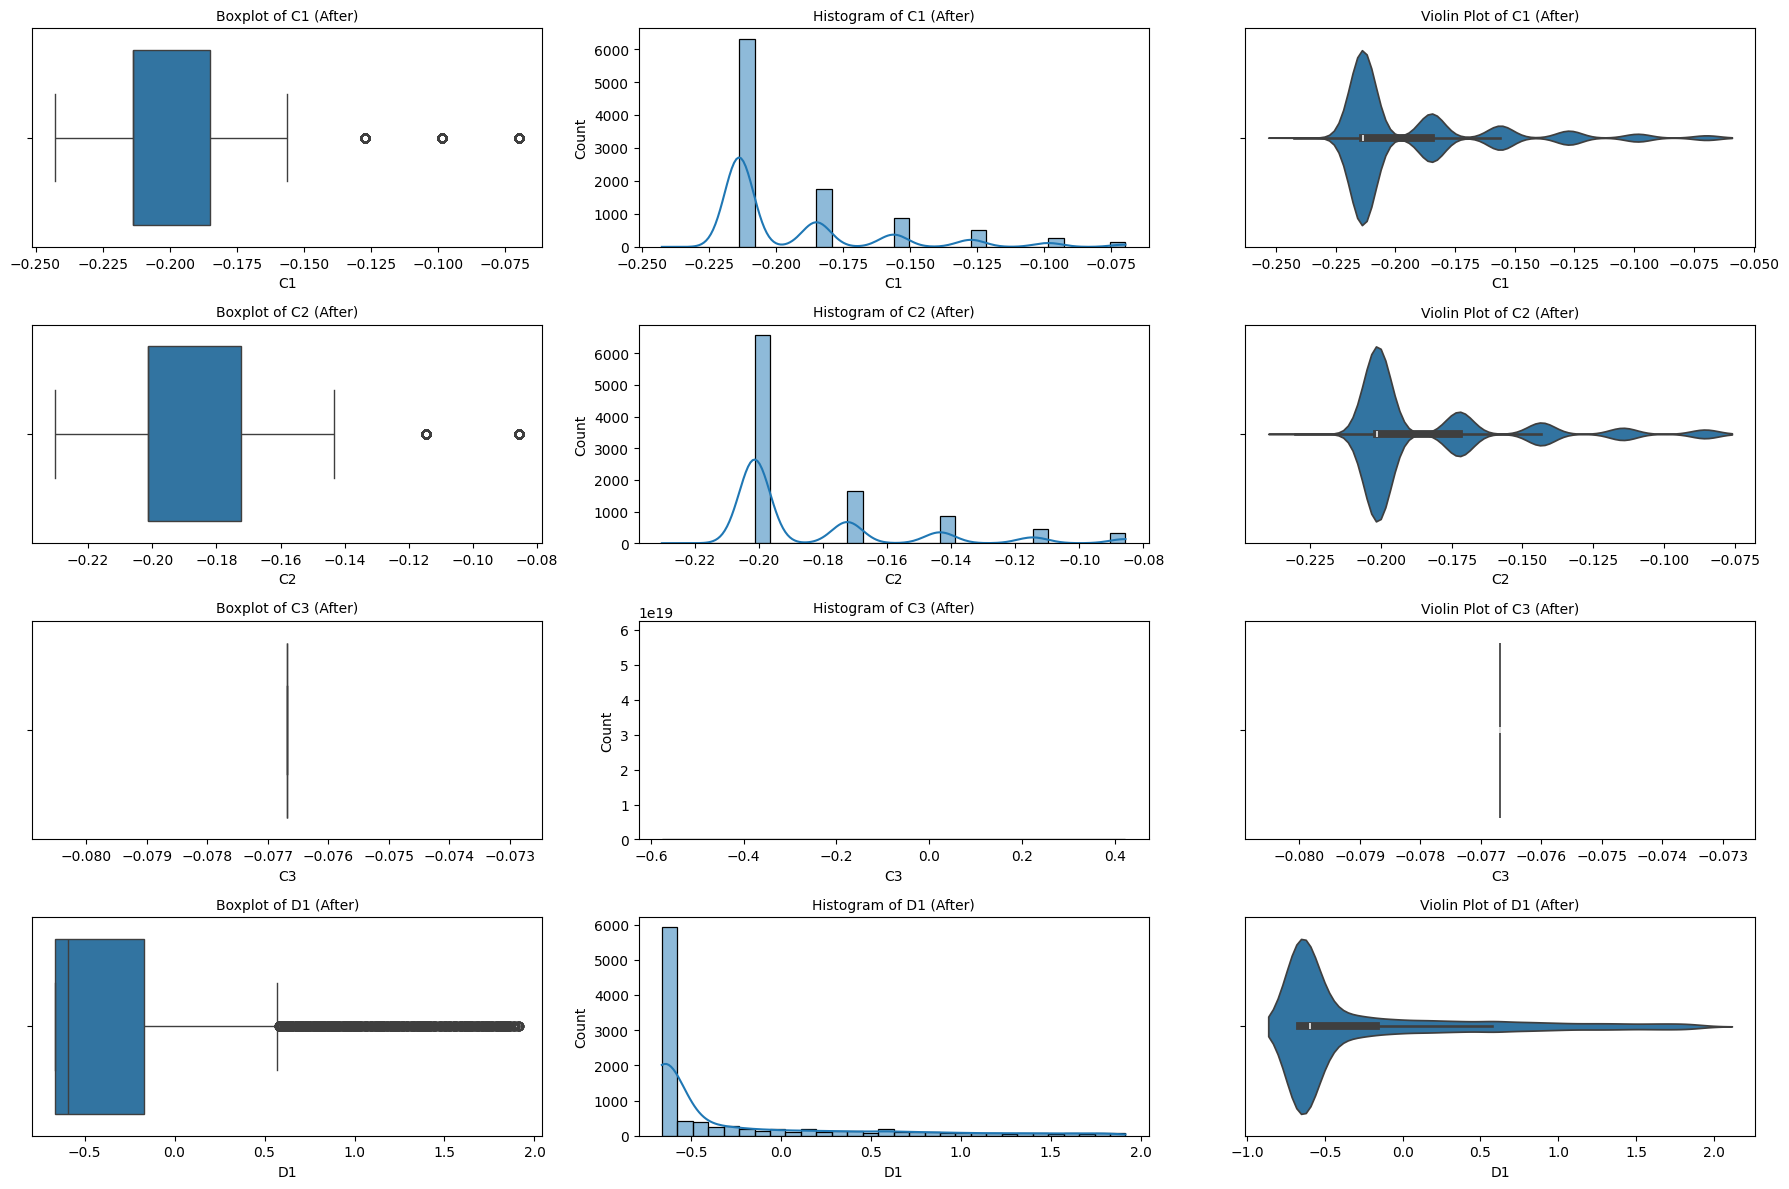

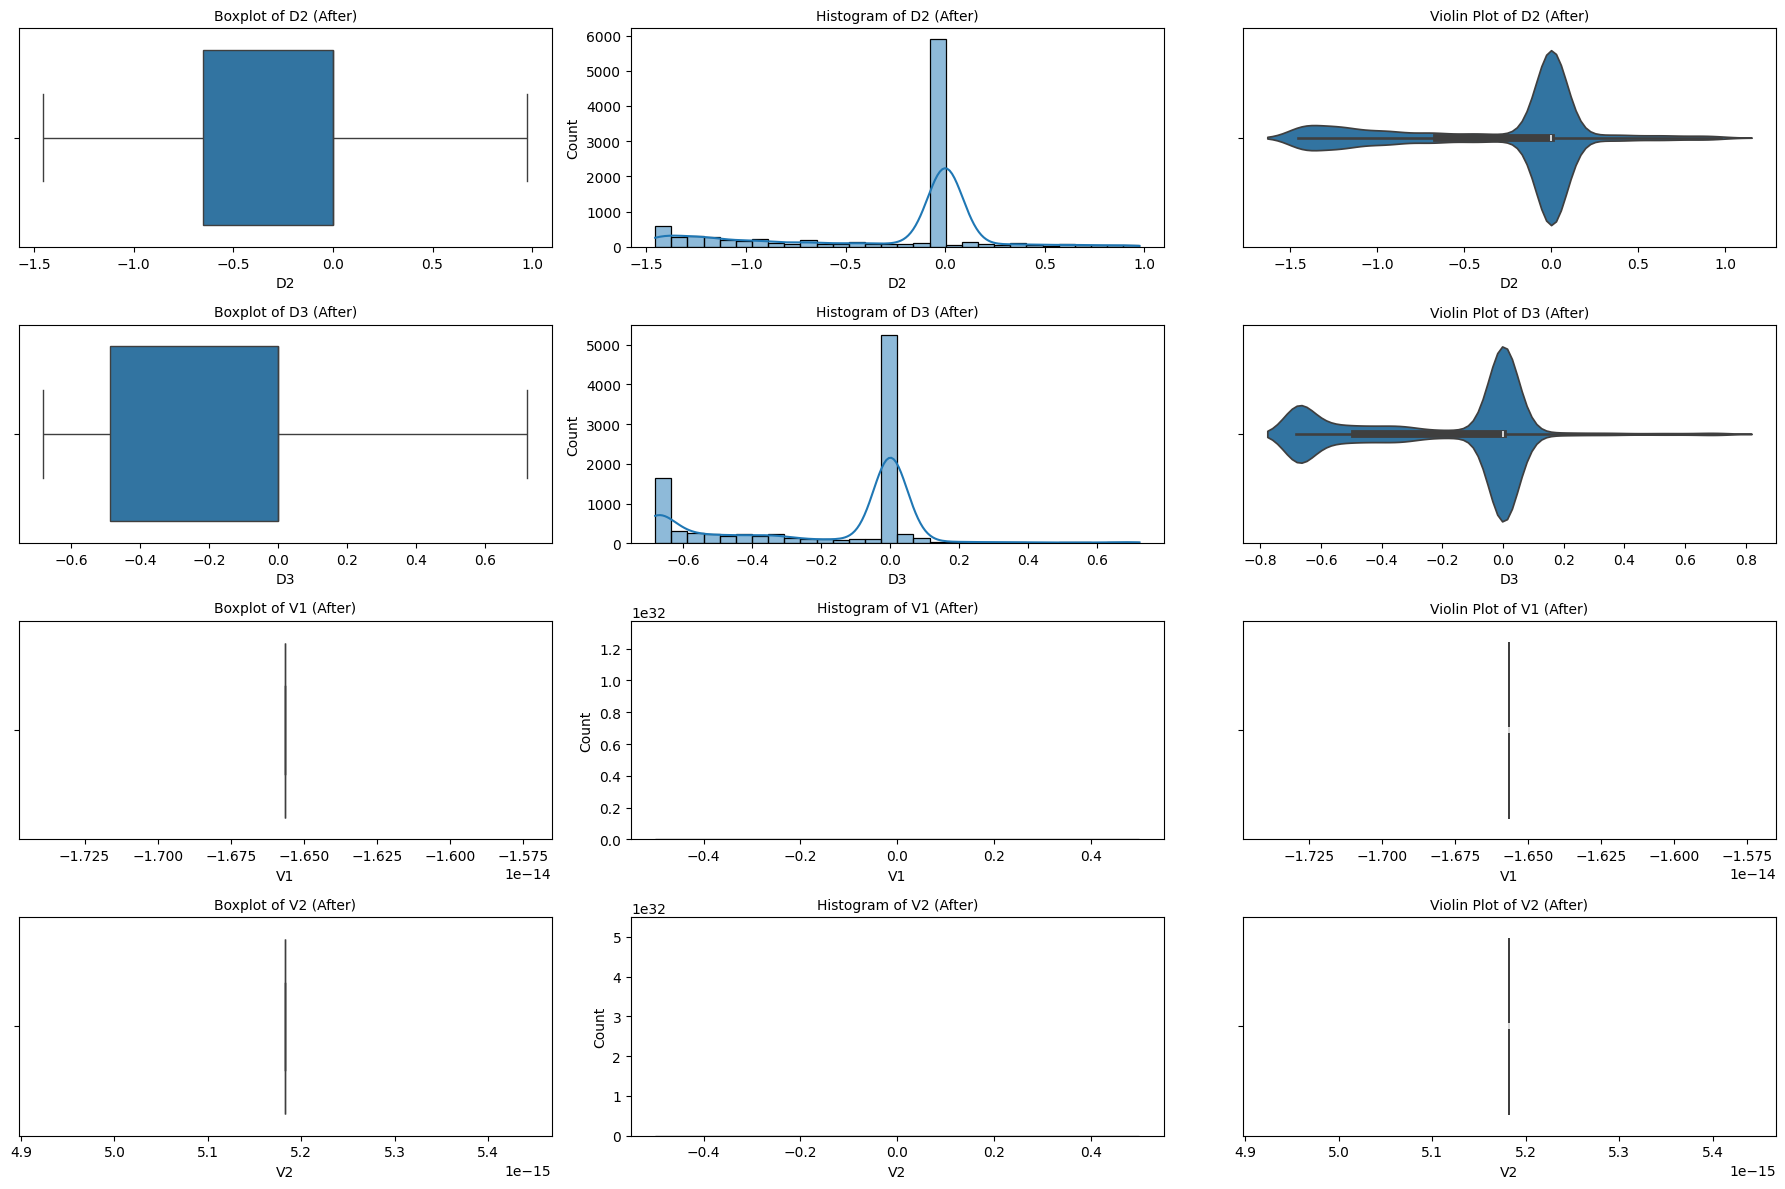

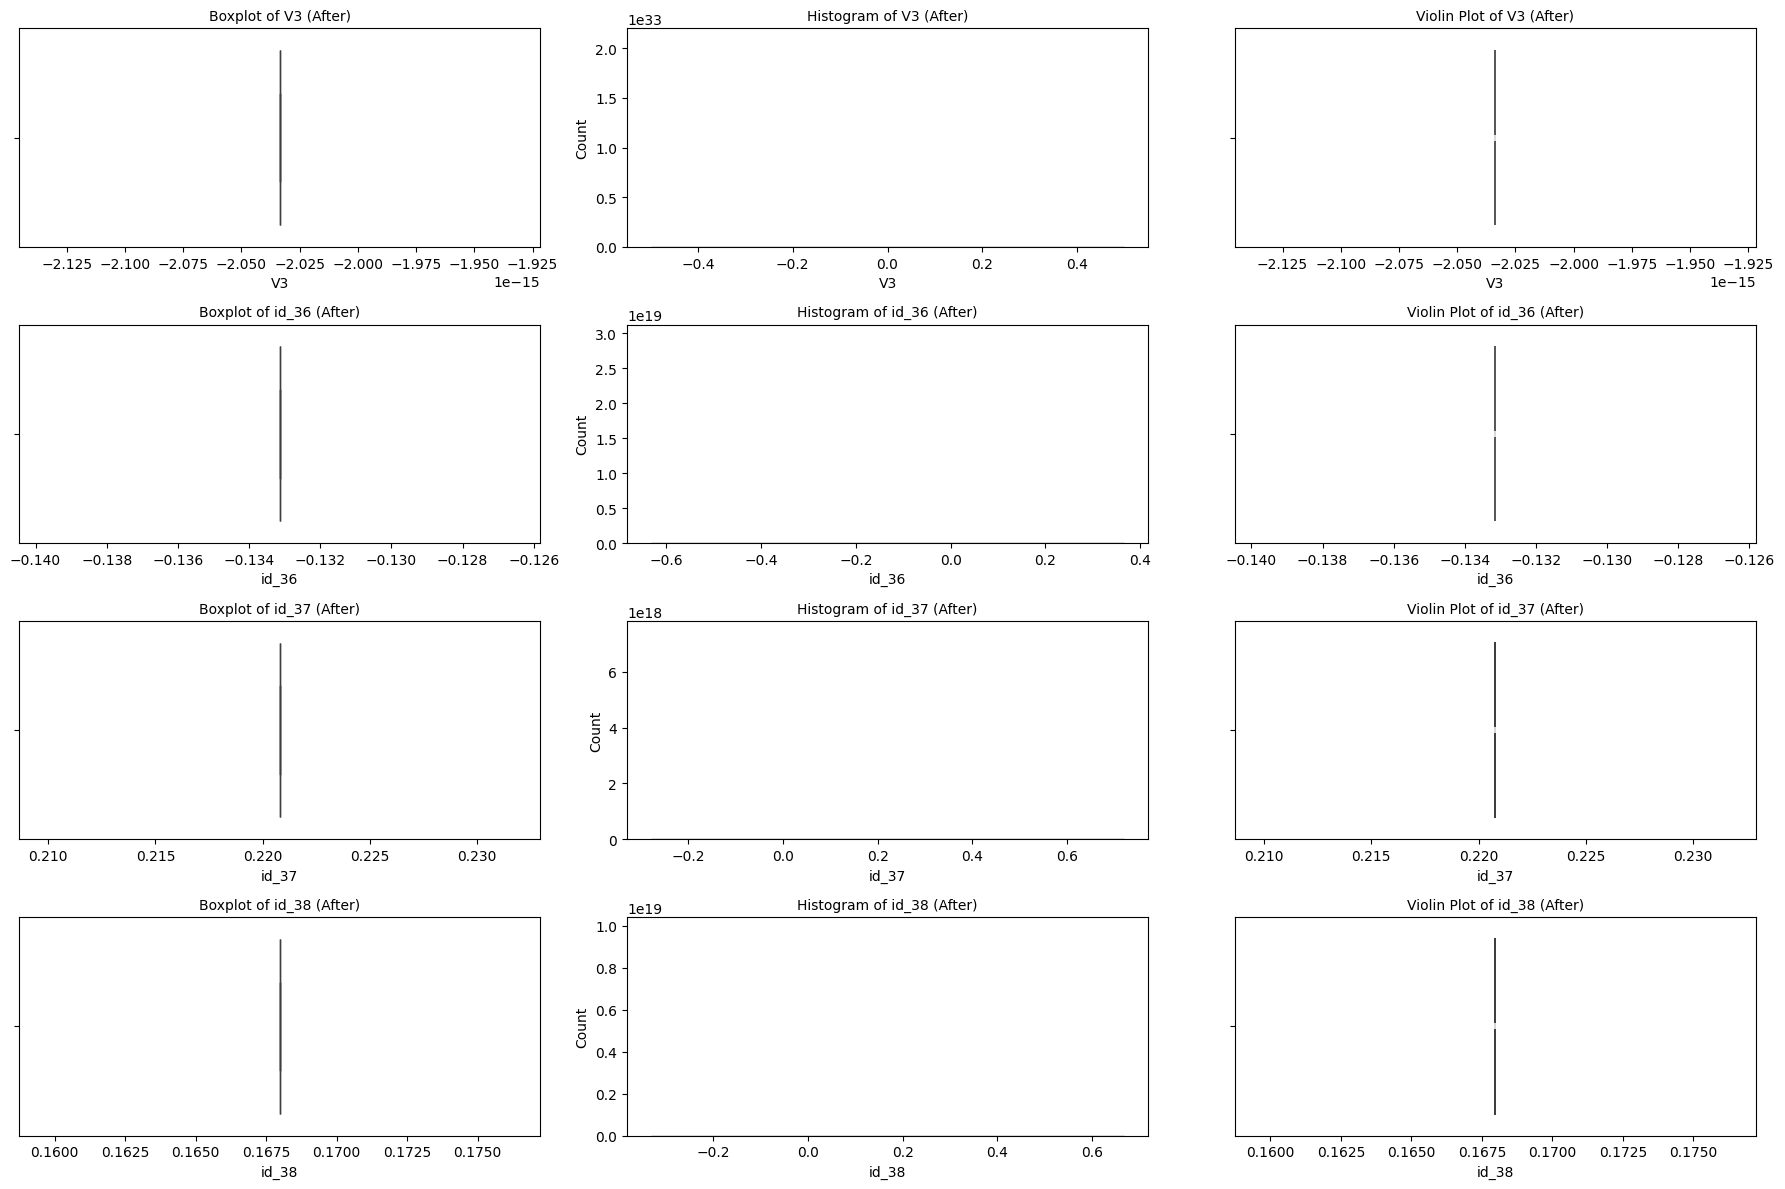

In [27]:
important_features = [
    'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
    'addr1', 'addr2', 'dist1', 'dist2',
    'C1', 'C2', 'C3', 'D1', 'D2', 'D3',
    'V1', 'V2', 'V3', 'id_36', 'id_37', 'id_38'
]

features = [col for col in important_features if col in train.columns]


df_clean = train.copy()


for col in features:
    median_value = train[col].median()
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean[col] = np.where((train[col] < lower_bound) | (train[col] > upper_bound), median_value, train[col])


batch_size = 4

for i in range(0, len(features), batch_size):
    batch = features[i:i + batch_size]
    plt.figure(figsize=(18, 12))

    for j, col in enumerate(batch):
        # Boxplot
        plt.subplot(len(batch), 3, j * 3 + 1)
        sns.boxplot(x=df_clean[col])
        plt.title(f'Boxplot of {col} (After)', fontsize=10)

        # Histogram
        plt.subplot(len(batch), 3, j * 3 + 2)
        sns.histplot(df_clean[col], bins=30, kde=True)
        plt.title(f'Histogram of {col} (After)', fontsize=10)

        # Violin plot
        plt.subplot(len(batch), 3, j * 3 + 3)
        sns.violinplot(x=df_clean[col])
        plt.title(f'Violin Plot of {col} (After)', fontsize=10)

    plt.tight_layout()
    plt.show()


Distribution of features

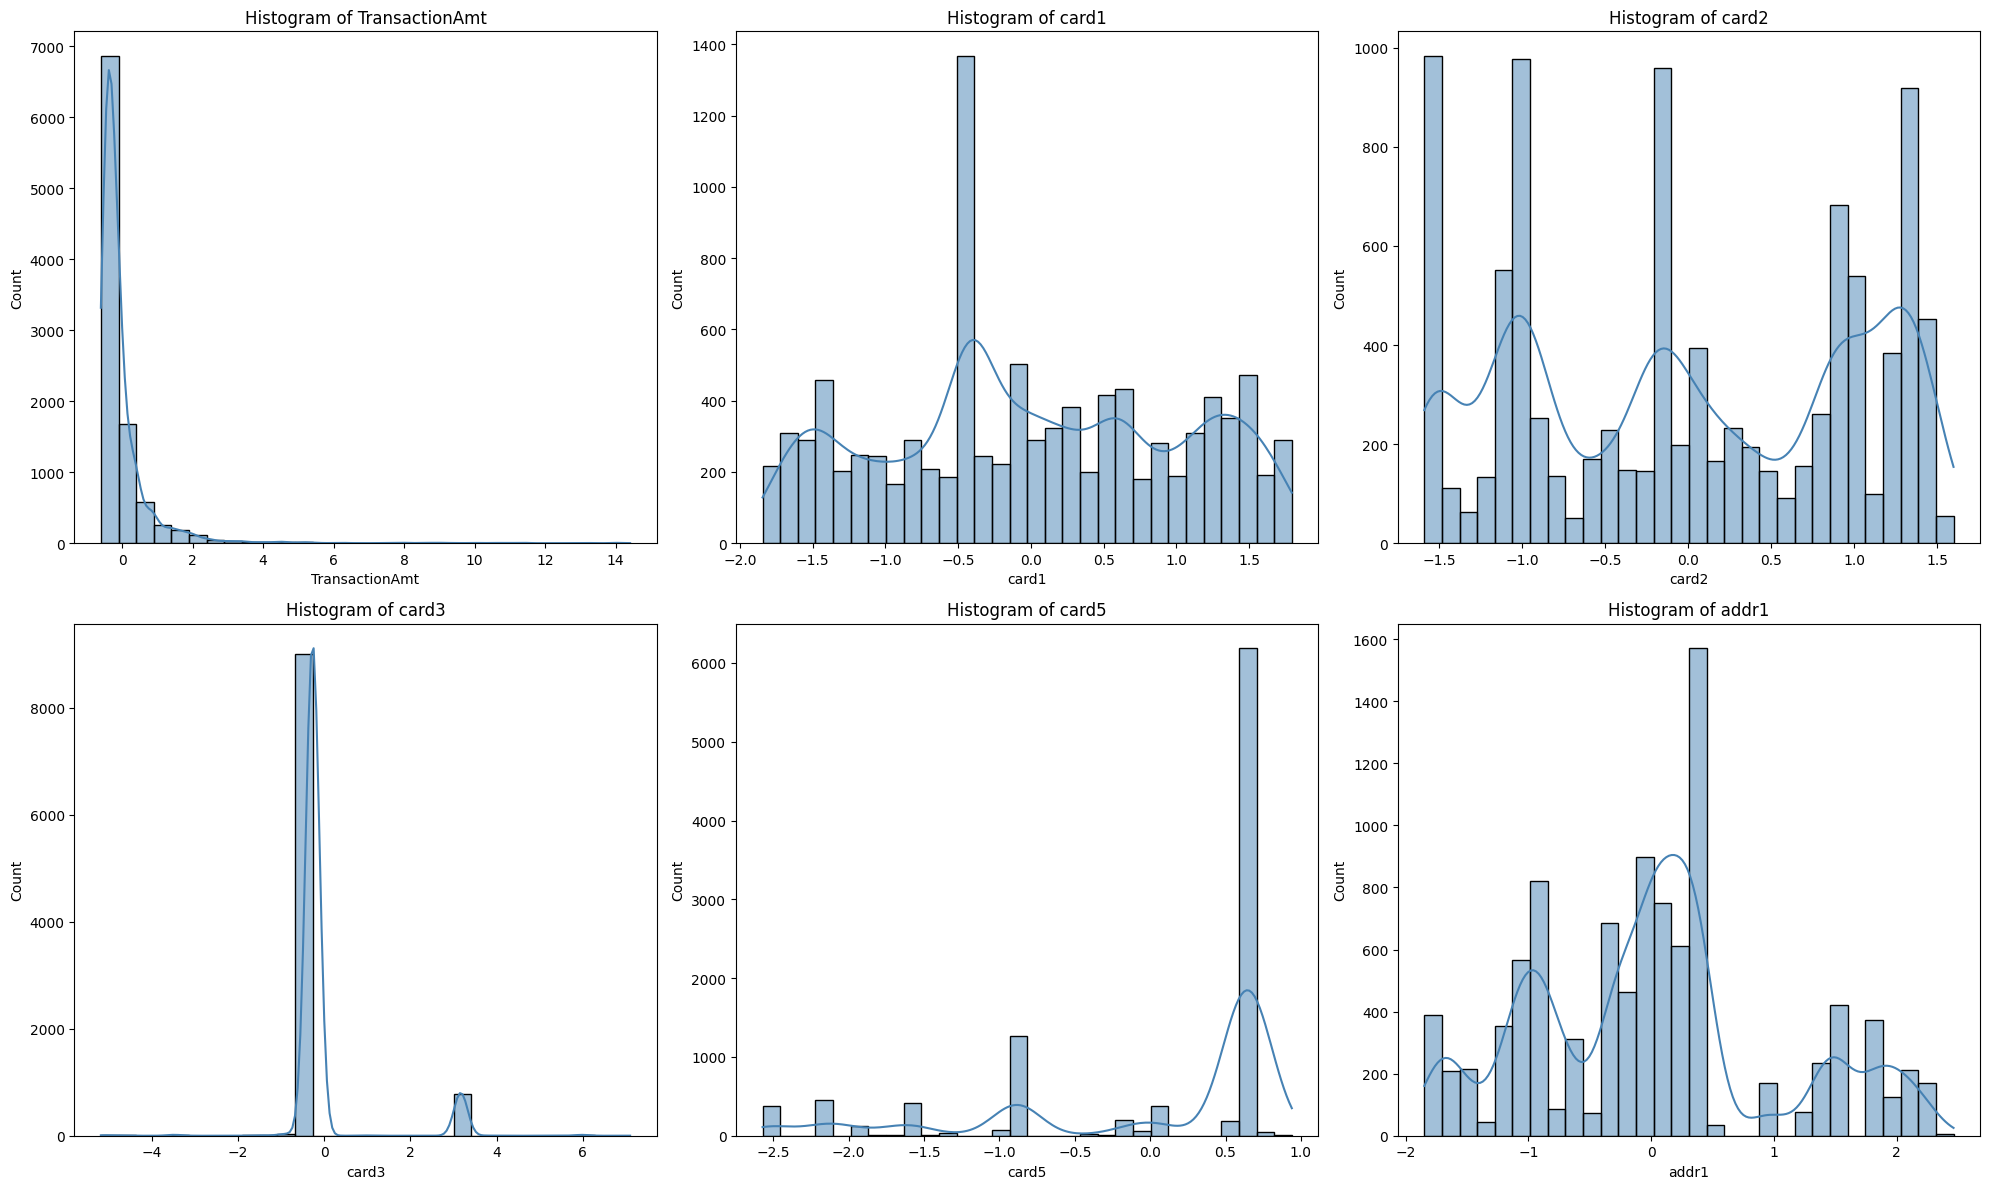

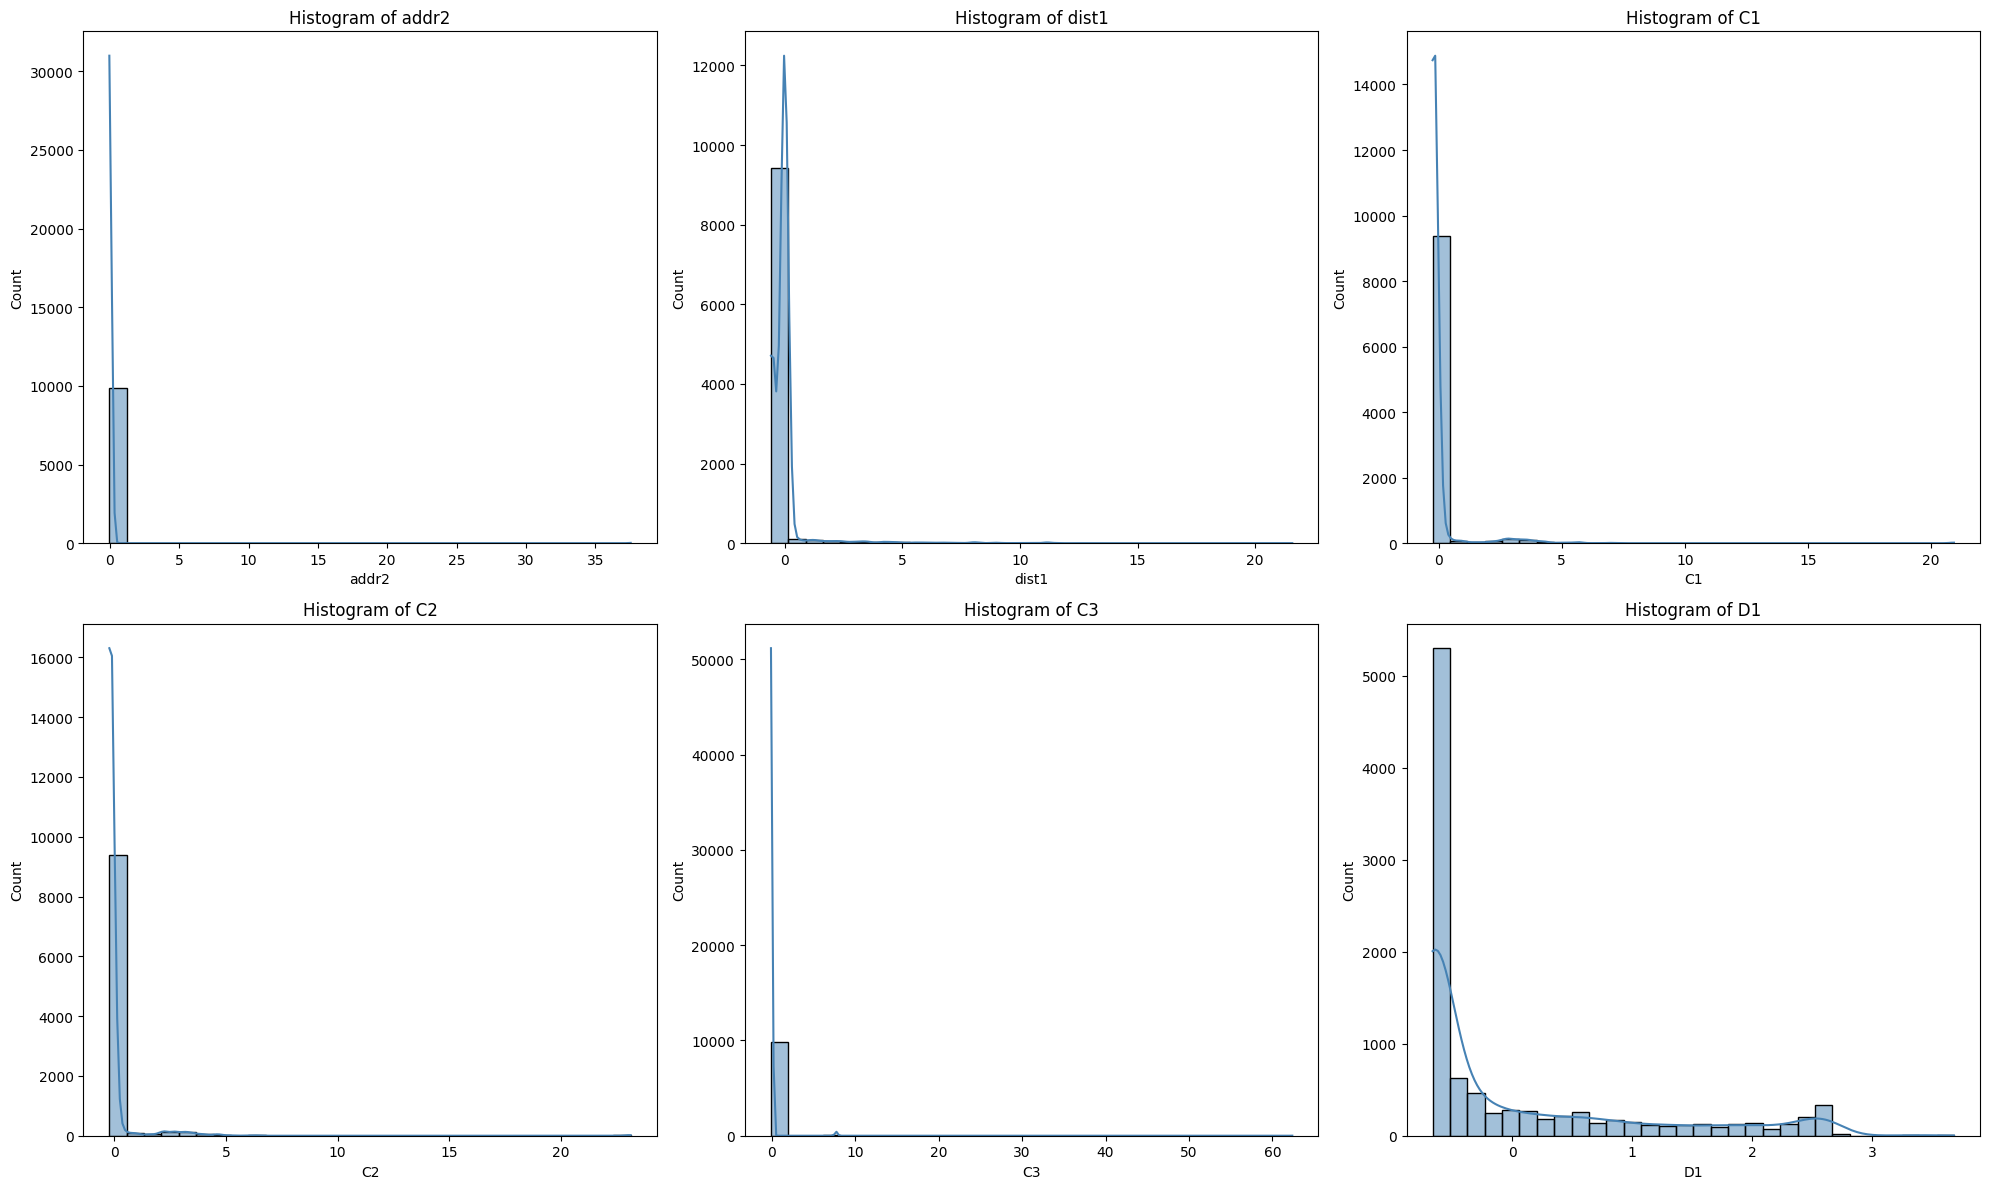

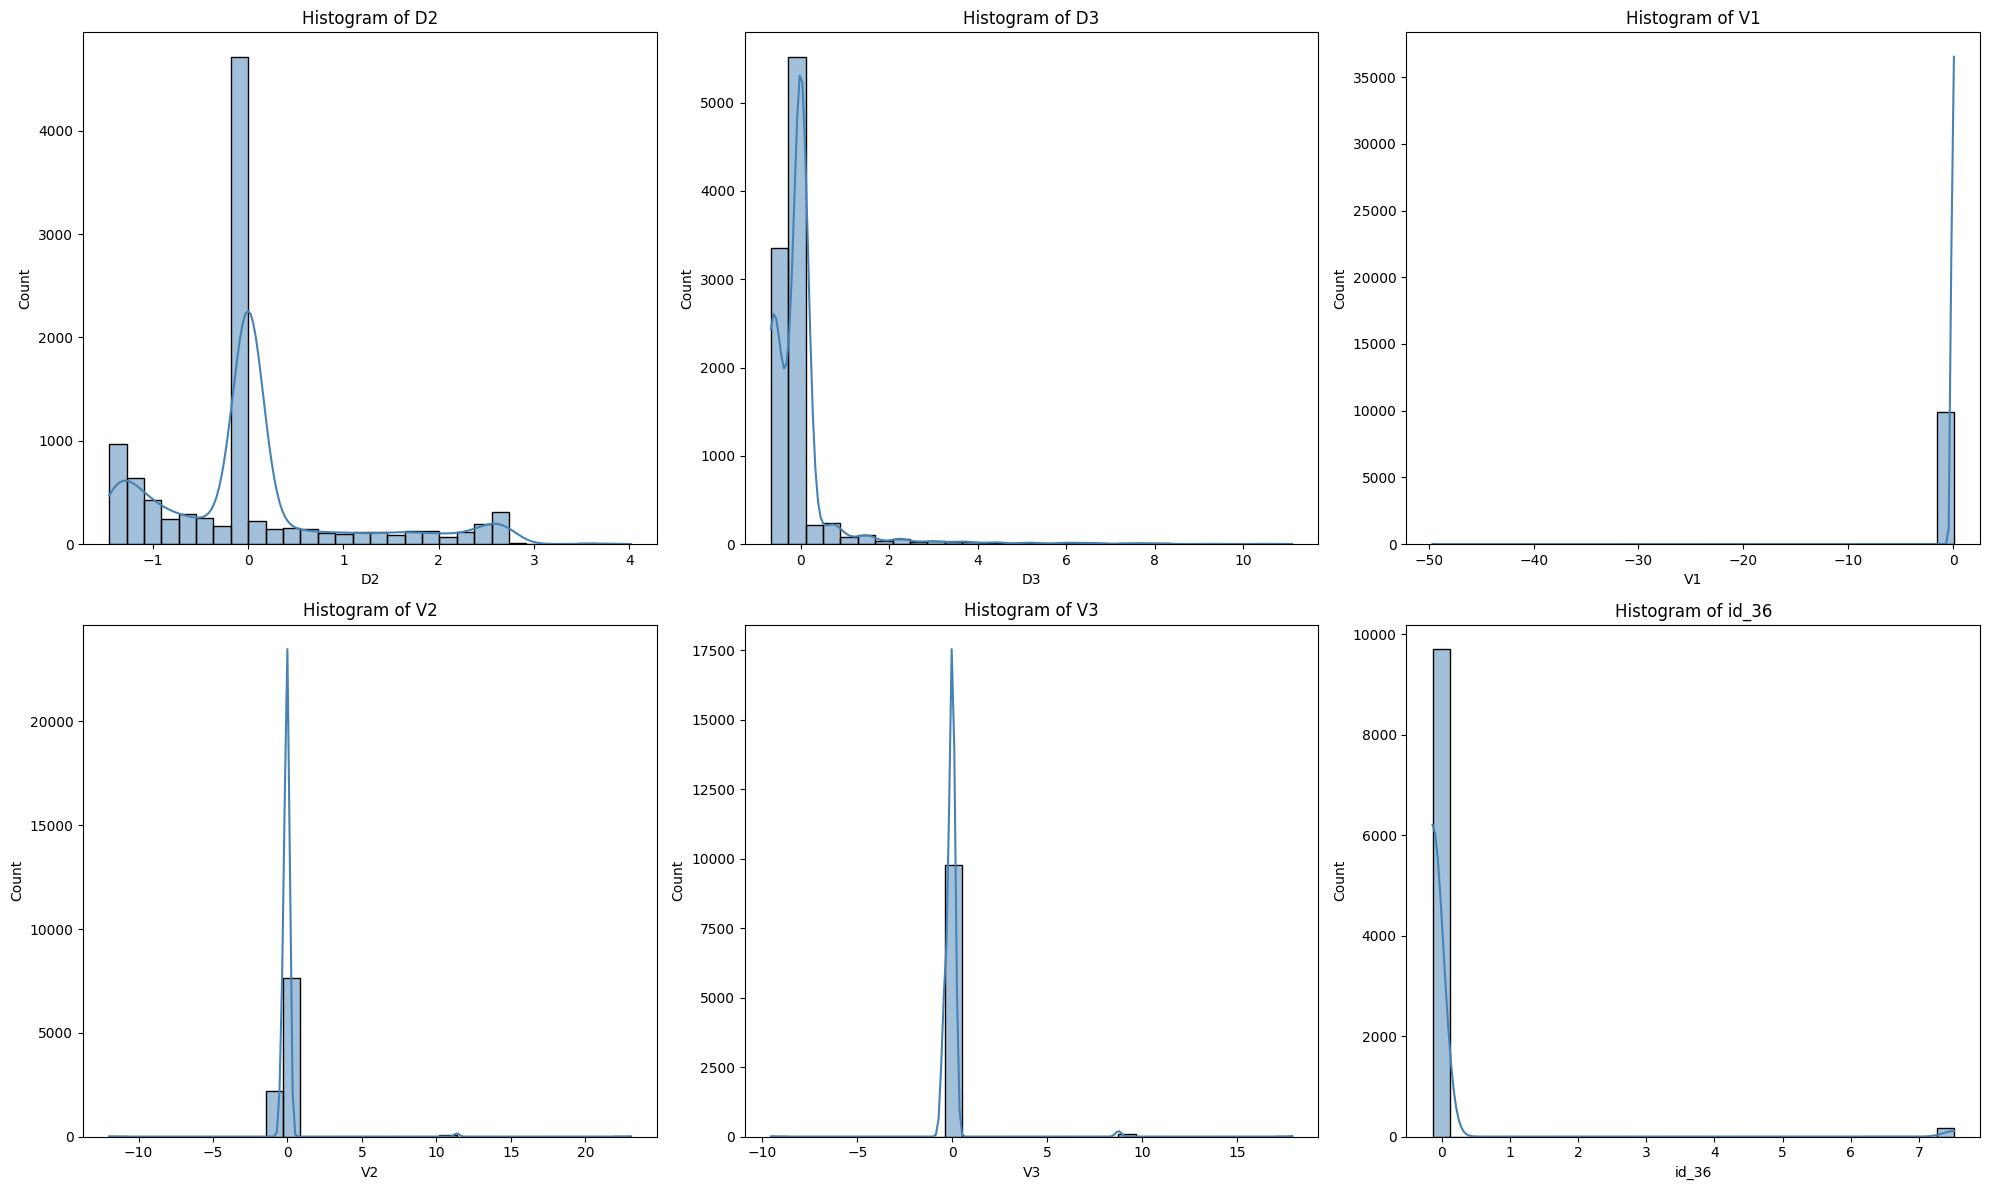

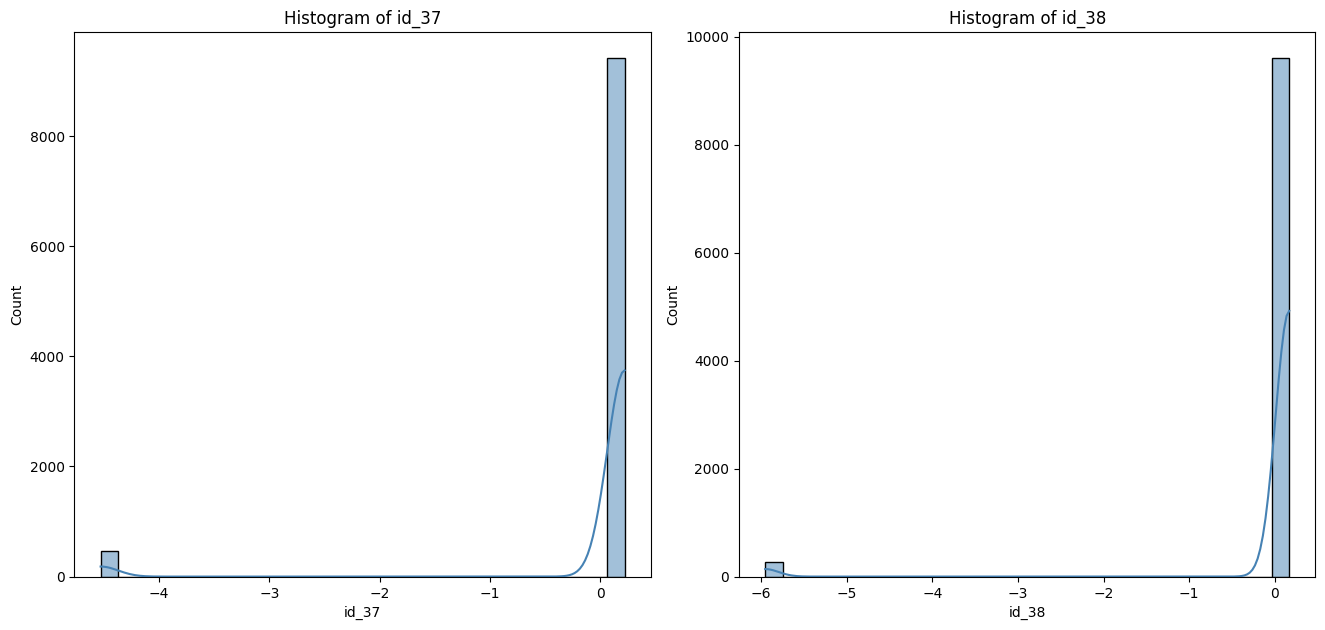

In [28]:
important_features = [
    'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
    'addr1', 'addr2', 'dist1', 'dist2',
    'C1', 'C2', 'C3', 'D1', 'D2', 'D3',
    'V1', 'V2', 'V3', 'id_36', 'id_37', 'id_38'
]

features = [col for col in important_features if col in train.columns]

# Plot histograms in batches
batch_size = 6

for i in range(0, len(features), batch_size):
    batch = features[i:i + batch_size]
    plt.figure(figsize=(20, 12))

    for j, col in enumerate(batch):
        plt.subplot(2, 3, j + 1)
        sns.histplot(train[col], bins=30, color='steelblue', kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

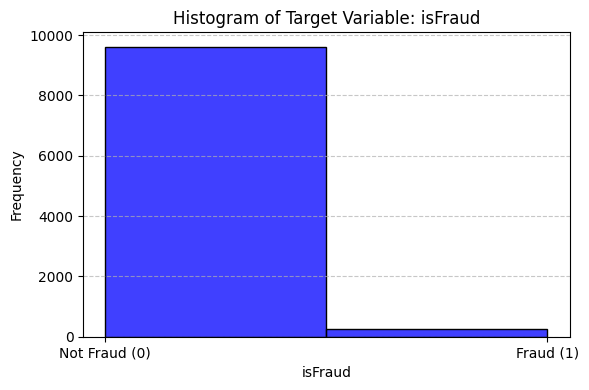

In [29]:
plt.figure(figsize=(6, 4))
sns.histplot(train['isFraud'], bins=2, color='blue')
plt.title('Histogram of Target Variable: isFraud')
plt.xlabel('isFraud')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import skew, kurtosis
print("Skewness:", skew(train[col].dropna()))
print("Kurtosis:", kurtosis(train[col].dropna()))


Skewness: -5.785095660449929
Kurtosis: 31.467331800556614


# EDA , Bivariate Analysis

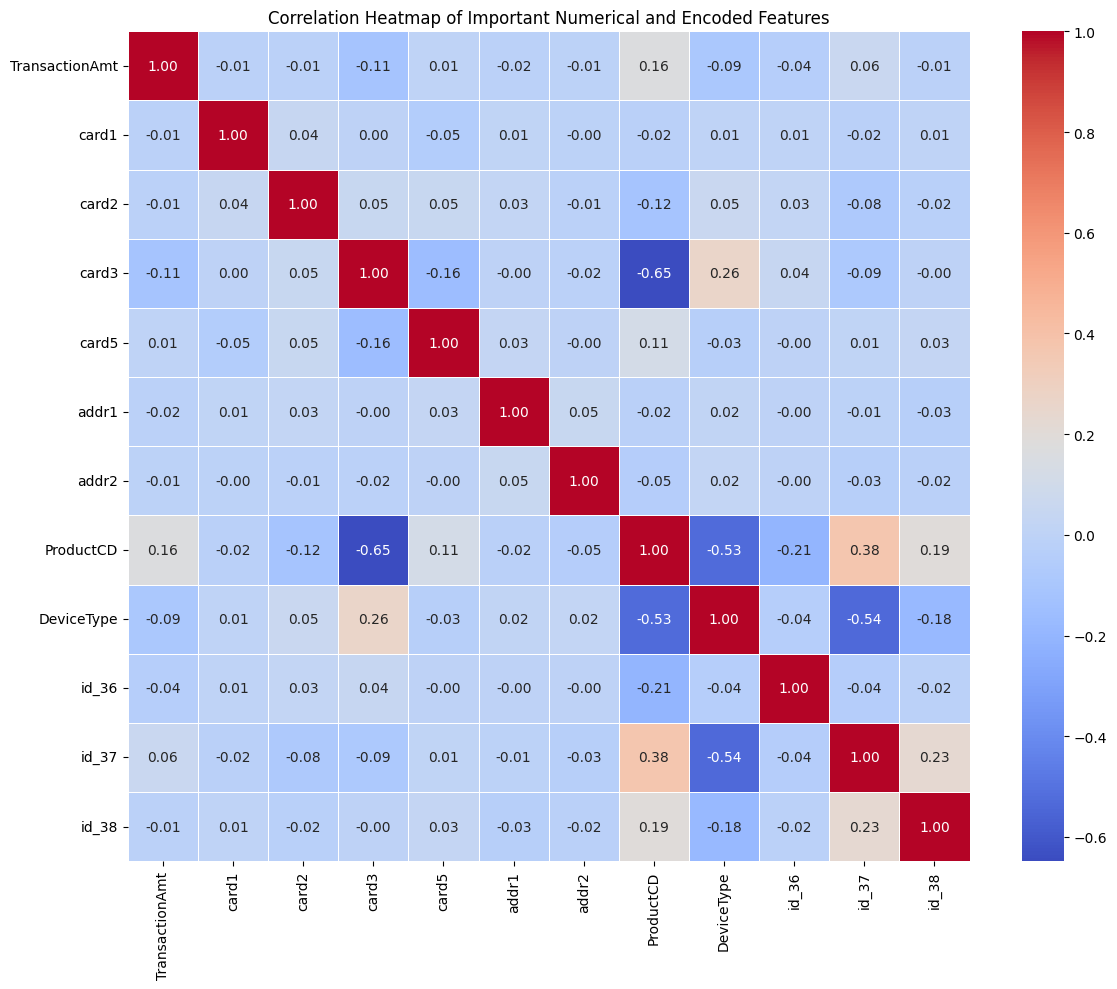

In [31]:
important_numerical_features = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2']


encoded_features = ['ProductCD', 'DeviceType', 'id_36', 'id_37', 'id_38']


selected_features = important_numerical_features + encoded_features

correlation_df = train[selected_features]


corr_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Important Numerical and Encoded Features")
plt.tight_layout()
plt.show()

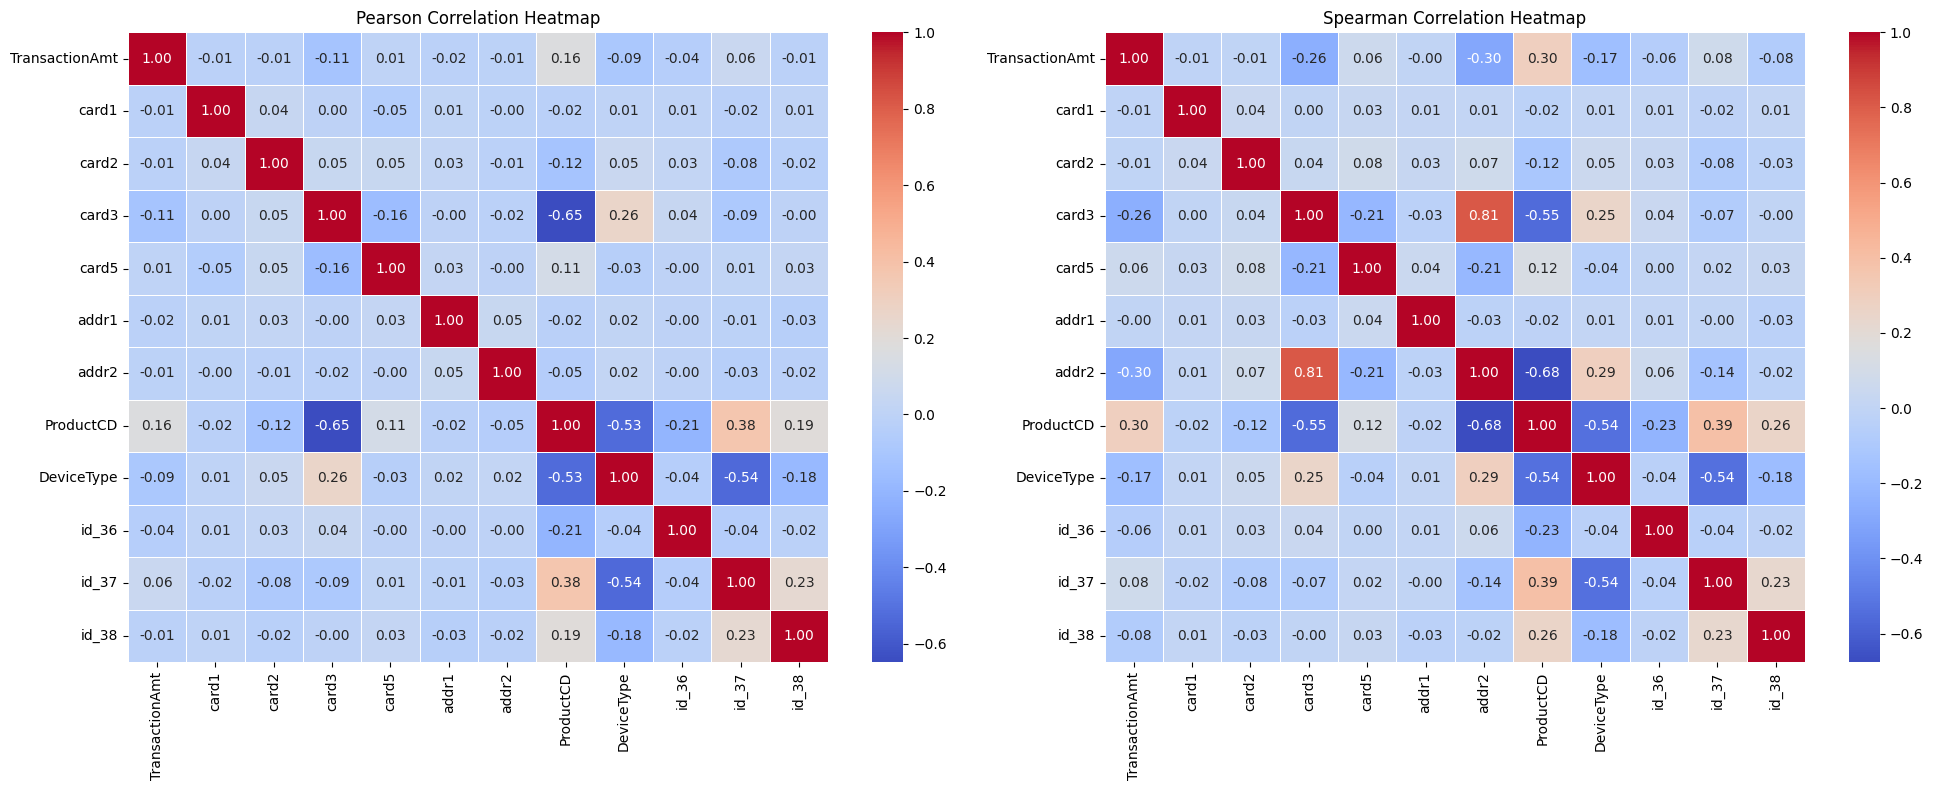

In [32]:
important_numerical_features = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2']
encoded_features = ['ProductCD', 'DeviceType', 'id_36', 'id_37', 'id_38']
selected_features = important_numerical_features + encoded_features


correlation_df = train[selected_features]

pearson_corr = correlation_df.corr(method='pearson')
spearman_corr = correlation_df.corr(method='spearman')


plt.figure(figsize=(20, 8))

# Pearson Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")

# Spearman Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")

plt.tight_layout()
plt.show()

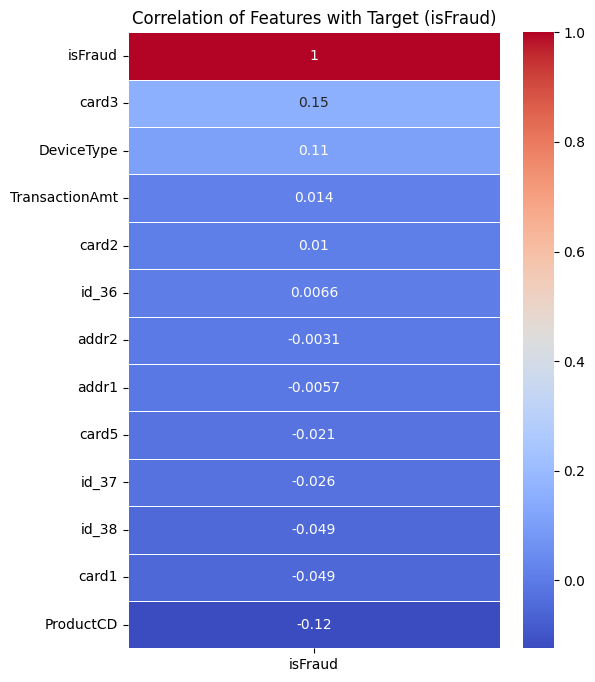

In [33]:
selected_features = important_numerical_features + encoded_features + ['isFraud']

numerical_df = train[selected_features]

# Compute correlation with the target
corr_matrix = numerical_df.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)


plt.figure(figsize=(6, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Features with Target (isFraud)")
plt.show()

# Feature Selection

In [34]:
X = train.drop(columns=['isFraud', 'TransactionID', 'TransactionDT'], errors='ignore')
y = train['isFraud']

Top 10 Mutual Information Features:
 card1             0.028019
TransactionAmt    0.025087
C12               0.016709
id_19             0.016260
card2             0.015640
D8                0.014571
C8                0.014546
C10               0.014026
C7                0.013827
C4                0.013602
dtype: float64


<ipython-input-44-8b548015f070>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mi.values, y=top_mi.index, palette="viridis")


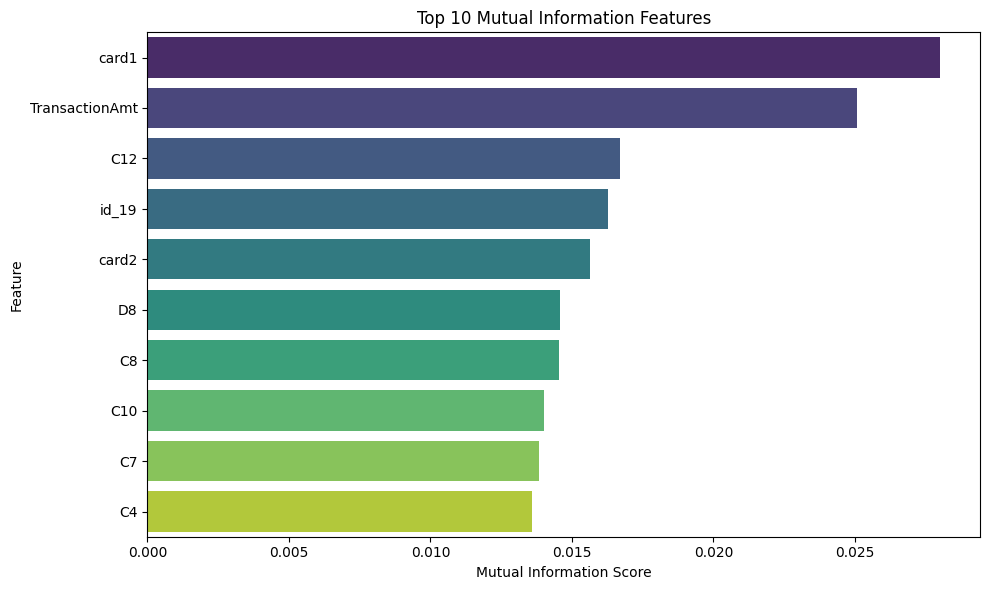

In [44]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_result = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Top 10 Mutual Information Features:\n", mi_result.head(10))
top_mi = mi_result.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_mi.values, y=top_mi.index, palette="viridis")

plt.title("Top 10 Mutual Information Features")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

 Top 10 Chi-Square Features:
 C12           177.738464
V120          160.202467
V122          141.068694
M4            125.366104
V112          111.113882
DeviceType    105.730402
V121           86.509658
V113           85.729316
V111           85.729316
C7             75.929331
dtype: float64


<ipython-input-45-605fe288df0f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chi.values, y=top_chi.index, palette="magma")


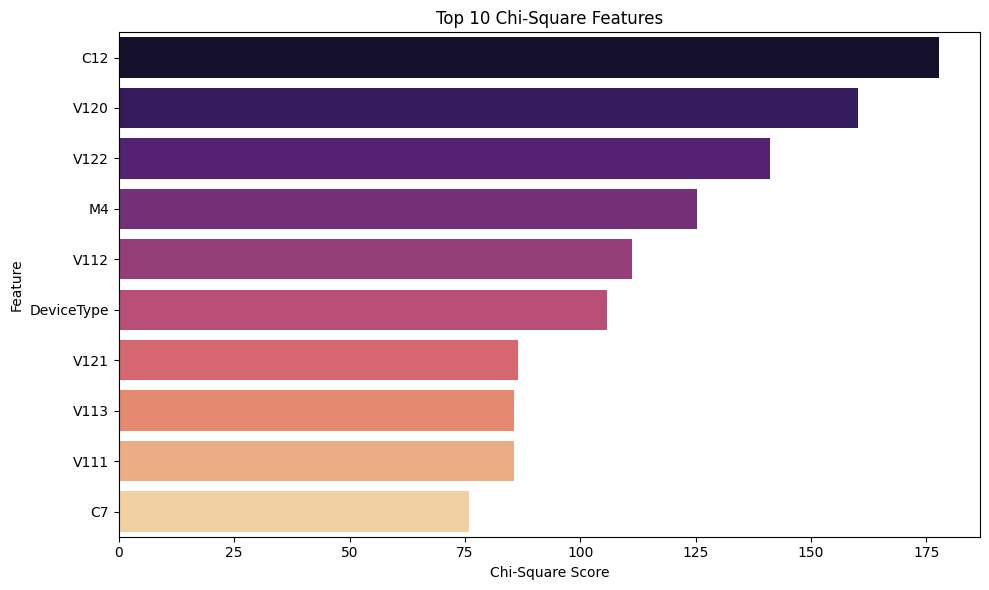

In [45]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)
chi_scores, _ = chi2(X_scaled, y)
chi_result = pd.Series(chi_scores, index=X.columns).sort_values(ascending=False)
print(" Top 10 Chi-Square Features:\n", chi_result.head(10))
top_chi = chi_result.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_chi.values, y=top_chi.index, palette="magma")

plt.title("Top 10 Chi-Square Features")
plt.xlabel("Chi-Square Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Top 10 Fisher Score Features:
 card6        0.331201
card3        0.246705
id_35        0.225327
ProductCD    0.209578
M4           0.189079
id_17        0.188948
V29          0.182180
V30          0.172038
V69          0.152715
D8           0.145430
dtype: float64


<ipython-input-46-16e2b6bb8c44>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fisher.values, y=top_fisher.index, palette="coolwarm")


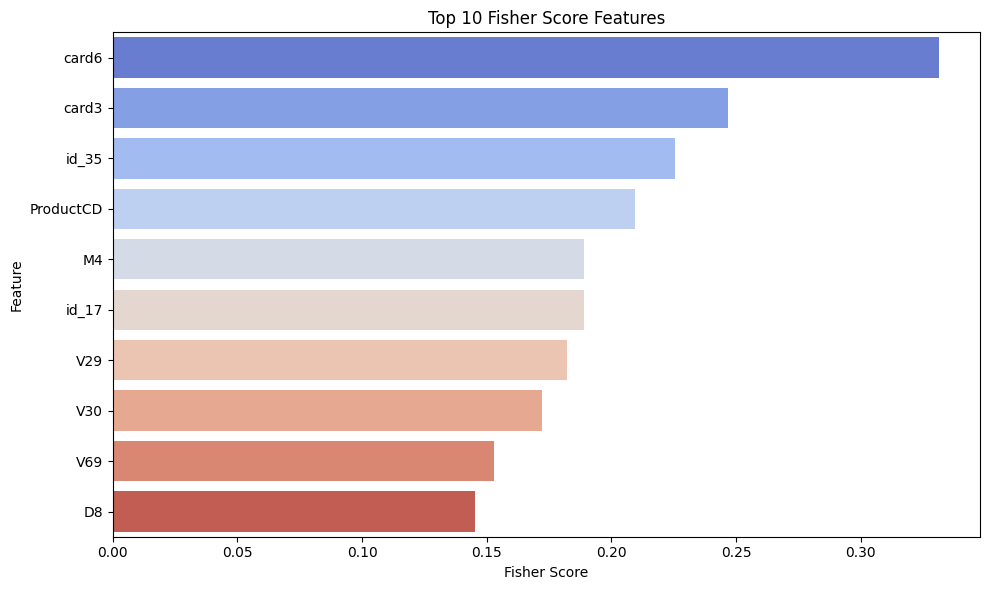

In [46]:
def fisher_score(X_df, y):
    scores = []
    for col in X_df.columns:
        mean0 = X_df[y == 0][col].mean()
        mean1 = X_df[y == 1][col].mean()
        var0 = X_df[y == 0][col].var()
        var1 = X_df[y == 1][col].var()
        score = (mean0 - mean1) ** 2 / (var0 + var1 + 1e-5)
        scores.append(score)
    return pd.Series(scores, index=X_df.columns).sort_values(ascending=False)

fisher_result = fisher_score(X, y)
print("Top 10 Fisher Score Features:\n", fisher_result.head(10))
top_fisher = fisher_result.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_fisher.values, y=top_fisher.index, palette="coolwarm")

plt.title("Top 10 Fisher Score Features")
plt.xlabel("Fisher Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 37 152 286 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
<ipython-input-47-e705cd155a55>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_anova.values, y=top_anova.index, palette="Blues_d")


Top 10 ANOVA F-test Features:
 C12      872.398150
C7       314.353990
V198     283.613973
V197     276.199959
V201     263.716277
card3    240.947185
id_35    237.642758
V200     229.379042
card6    214.264418
V156     213.756379
dtype: float64


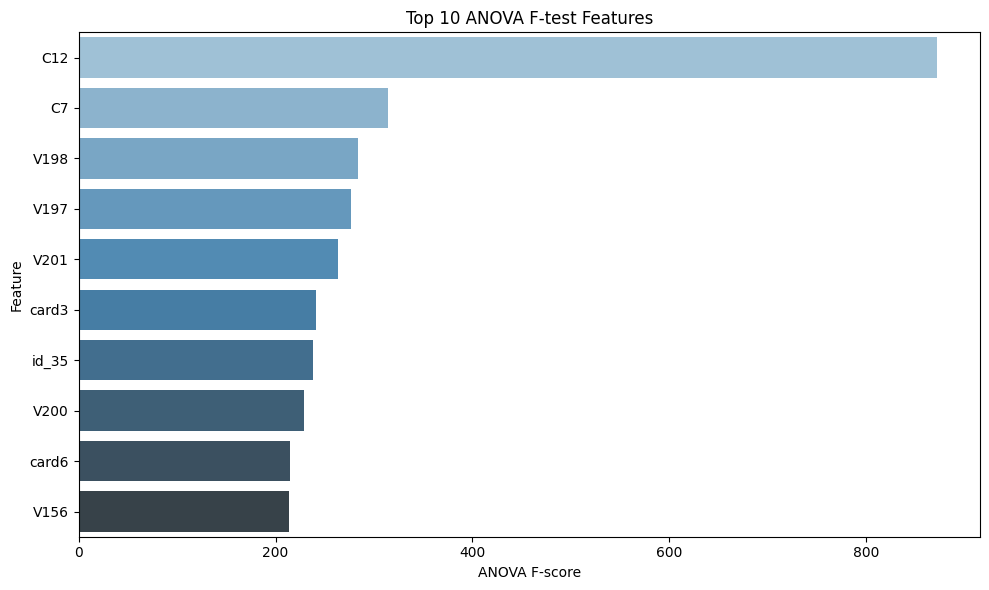

In [47]:
from sklearn.feature_selection import f_classif

f_scores, _ = f_classif(X, y)
anova_result = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)
print("Top 10 ANOVA F-test Features:\n", anova_result.head(10))
top_anova = anova_result.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_anova.values, y=top_anova.index, palette="Blues_d")

plt.title("Top 10 ANOVA F-test Features")
plt.xlabel("ANOVA F-score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [48]:
top_features_union = set(mi_result.head(10).index) | \
                     set(chi_result.head(10).index) | \
                     set(fisher_result.head(10).index) | \
                     set(anova_result.head(10).index)
top_features_union = list(top_features_union)

<ipython-input-49-1091428c789a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_scores.values, y=top_features_scores.index, palette="coolwarm")


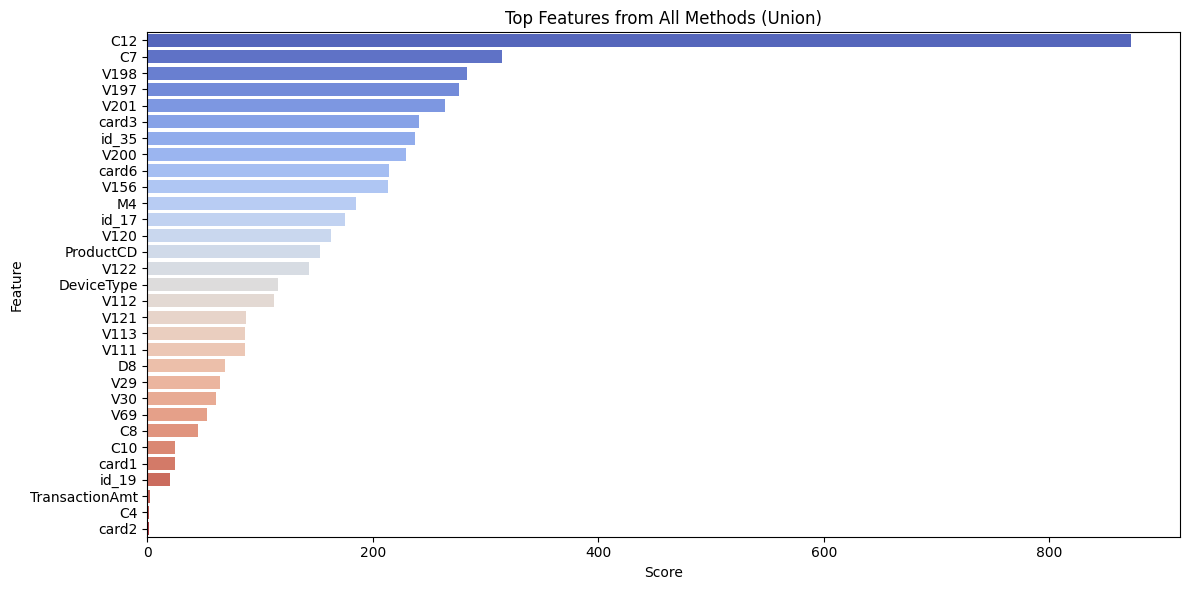

In [49]:
top_features_scores = {}

# Mutual Information Scores
for feature in top_features_union:
    if feature in mi_result.index:
        top_features_scores[feature] = mi_result[feature]

# Chi-Square Scores
for feature in top_features_union:
    if feature in chi_result.index:
        top_features_scores[feature] = chi_result[feature]

# Fisher Scores
for feature in top_features_union:
    if feature in fisher_result.index:
        top_features_scores[feature] = fisher_result[feature]

# ANOVA F-scores
for feature in top_features_union:
    if feature in anova_result.index:
        top_features_scores[feature] = anova_result[feature]

# Convert scores into a pandas Series and sort
top_features_scores = pd.Series(top_features_scores).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_features_scores.values, y=top_features_scores.index, palette="coolwarm")

plt.title("Top Features from All Methods (Union)")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Logistic Regression Model

In [41]:
X_selected = X[top_features_union]
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [42]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_val)

print("Accuracy on Validation Set:", accuracy_score(y_val, y_pred))
print("\n Classification Report:\n", classification_report(y_val, y_pred))

Accuracy on Validation Set: 0.9807594936708861

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1926
           1       0.87      0.27      0.41        49

    accuracy                           0.98      1975
   macro avg       0.92      0.63      0.70      1975
weighted avg       0.98      0.98      0.98      1975



In [43]:
# Ensure consistent features between train and test
shared_features = [feat for feat in top_features_union if feat in test.columns]
X_train_full = train[shared_features]
y_train_full = train['isFraud']
X_test = test[shared_features]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_full, y_train_full)

test_preds = final_model.predict(X_test)

# Create submission
submission = pd.DataFrame({
    'TransactionID': test['TransactionID'],
    'isFraud': test_preds
})

submission.to_csv("sample_submission.csv", index=False)
print("sample_submission.csv has been created successfully!")

# Preview
print("\n Preview of sample_submission.csv:")
print(submission.head())


sample_submission.csv has been created successfully!

 Preview of sample_submission.csv:
   TransactionID  isFraud
0      -1.731863        0
1      -1.731487        0
2      -1.731112        0
3      -1.730736        0
4      -1.730360        0
